# WGAN-GP Training

## imports

In [1]:
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
# config.gpu_options.per_process_gpu_memory_fraction = 0.4
config.gpu_options.allow_growth=True
set_session(tf.Session(config=config))

Using TensorFlow backend.


In [2]:
%matplotlib inline

import os
import matplotlib.pyplot as plt

from models.WGANGP import WGANGP
from utils.loaders import load_celeb

import pickle


In [3]:
# run params
SECTION = 'wgan'
RUN_ID = '0003'
DATA_NAME = 'celeb'
RUN_FOLDER = f'run/{SECTION}/'
RUN_FOLDER += f'{RUN_ID}_{DATA_NAME}'

for p in ['run', f'run/{SECTION}']:
    if not os.path.exists(p):
        os.mkdir(p)

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

mode =  'build' #'load' #

## data

In [4]:
BATCH_SIZE = 64
IMAGE_SIZE = 64

In [5]:
x_train = load_celeb(DATA_NAME, IMAGE_SIZE, BATCH_SIZE)

Found 202599 images belonging to 1 classes.


In [6]:
x_train[0][0][0]

array([[[-0.69411767, -0.75686276, -0.77254903],
        [-0.6862745 , -0.7490196 , -0.7647059 ],
        [-0.67058825, -0.7490196 , -0.75686276],
        ...,
        [-0.46666667, -0.70980394, -0.7254902 ],
        [-0.46666667, -0.70980394, -0.7254902 ],
        [-0.4745098 , -0.70980394, -0.7254902 ]],

       [[-0.6784314 , -0.7411765 , -0.7647059 ],
        [-0.6627451 , -0.7411765 , -0.75686276],
        [-0.654902  , -0.7411765 , -0.75686276],
        ...,
        [-0.46666667, -0.70980394, -0.7254902 ],
        [-0.46666667, -0.70980394, -0.7254902 ],
        [-0.4745098 , -0.70980394, -0.7254902 ]],

       [[-0.654902  , -0.7254902 , -0.7647059 ],
        [-0.64705884, -0.73333335, -0.7647059 ],
        [-0.64705884, -0.73333335, -0.7647059 ],
        ...,
        [-0.46666667, -0.70980394, -0.7254902 ],
        [-0.46666667, -0.70980394, -0.7254902 ],
        [-0.4745098 , -0.70980394, -0.7254902 ]],

       ...,

       [[ 0.5764706 ,  0.5372549 ,  0.23921569],
        [ 0

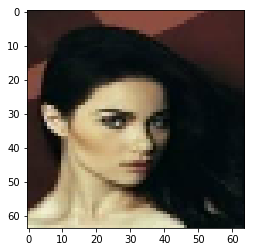

In [7]:
plt.imshow((x_train[0][0][0]+1)/2)

## architecture

In [8]:
image_dim = (IMAGE_SIZE, IMAGE_SIZE, 3)
latent_dim = 100

generator_initial_dim = (4, 4, 512)

generator_activation = 'leaky_relu'
critic_activation = 'leaky_relu'

critic_learning_rate = 0.0002,
generator_learning_rate = 0.0002,
generator_batch_norm_momentum = 0.9
critic_batch_norm_momentum = None
critic_dense_dim = 0
generator_dropout_rate = None
critic_dropout_rate = None

gradient_penalty_weight = 10.

generator_convolutional_params = [
    {'strides': (2, 2), 'filters': 256, 'kernel_size': (5, 5), 'upsample': 1, 'transpose': True,},
    {'strides': (2, 2), 'filters': 128, 'kernel_size': (5, 5), 'upsample': 1, 'transpose': True,},
    {'strides': (2, 2), 'filters': 64, 'kernel_size': (5, 5), 'upsample': 1, 'transpose': True,},
    {'strides': (2, 2), 'filters': 3, 'kernel_size': (5, 5), 'upsample': 1, 'transpose': True,},
    ]

critic_convolutional_params = [
    {'strides': (2, 2), 'filters': 64, 'kernel_size': (5, 5),},
    {'strides': (2, 2), 'filters': 128, 'kernel_size': (5, 5),},
    {'strides': (2, 2), 'filters': 256, 'kernel_size': (5, 5),},
    {'strides': (2, 2), 'filters': 512, 'kernel_size': (5, 5),},
    ]

In [9]:
gan = WGANGP(
    image_dim=image_dim,
    latent_dim=latent_dim,
    generator_initial_dim=generator_initial_dim,
    critic_dense_dim=critic_dense_dim,
    generator_activation=generator_activation,
    critic_activation=critic_activation,
    generator_convolutional_params=generator_convolutional_params,
    critic_learning_rate = critic_learning_rate,
    generator_learning_rate = generator_learning_rate,
    batch_size=BATCH_SIZE,
    critic_convolutional_params=critic_convolutional_params,
    generator_batch_norm_momentum=generator_batch_norm_momentum,
    critic_batch_norm_momentum=critic_batch_norm_momentum,
    generator_dropout_rate=generator_dropout_rate,
    critic_dropout_rate=critic_dropout_rate,
    gradient_penalty_weight=gradient_penalty_weight,
    )

if mode == 'build':
    gan.save(RUN_FOLDER)
else:
    gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

W0608 10:19:30.068366 140273504646912 deprecation.py:506] From /home/comadan/.venv/gdl/lib/python3.6/site-packages/tensorflow_core/python/ops/resource_variable_ops.py:1630: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Model: "generator_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 8192)              827392    
_________________________________________________________________
batch_normalization_1 (Batch (None, 8192)              32768     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 8192)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 4, 4, 512)         0         
_________________________________________________________________
generator_conv2dtranspose_0  (None, 8, 8, 256)         3277056   
_________________________________________________________________
batch_normalization_2 (Batch (None, 8, 8, 256)     

/home/comadan/.venv/gdl/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [10]:
gan.critic_model.summary()

Model: "critic_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
critic_input (InputLayer)    (None, 64, 64, 3)         0         
_________________________________________________________________
critic_conv2d_0 (Conv2D)     (None, 32, 32, 64)        4864      
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 32, 32, 64)        0         
_________________________________________________________________
critic_conv2d_1 (Conv2D)     (None, 16, 16, 128)       204928    
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 16, 16, 128)       0         
_________________________________________________________________
critic_conv2d_2 (Conv2D)     (None, 8, 8, 256)         819456    
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 8, 8, 256)        

In [11]:
gan.critic_gp_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 100)          0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
generator_model (Model)         (None, 64, 64, 3)    5168003     input_2[0][0]                    
__________________________________________________________________________________________________
random_weighted_average_1 (Rand (None, 64, 64, 3)    0           input_1[0][0]                    
                                                                 generator_model[1][0]      

/home/comadan/.venv/gdl/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [12]:
gan.generator_model.summary()

Model: "generator_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 8192)              827392    
_________________________________________________________________
batch_normalization_1 (Batch (None, 8192)              32768     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 8192)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 4, 4, 512)         0         
_________________________________________________________________
generator_conv2dtranspose_0  (None, 8, 8, 256)         3277056   
_________________________________________________________________
batch_normalization_2 (Batch (None, 8, 8, 256)     

In [13]:
gan.generator_model.summary()

Model: "generator_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 8192)              827392    
_________________________________________________________________
batch_normalization_1 (Batch (None, 8192)              32768     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 8192)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 4, 4, 512)         0         
_________________________________________________________________
generator_conv2dtranspose_0  (None, 8, 8, 256)         3277056   
_________________________________________________________________
batch_normalization_2 (Batch (None, 8, 8, 256)     

## training

In [14]:
EPOCHS = 6000
PRINT_EVERY_N_BATCHES = 5
N_CRITIC = 5
BATCH_SIZE = 64

In [15]:
gan.train(     
    x_train
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
    , critic_training_steps=N_CRITIC
    , using_generator = True
)

W0608 10:19:32.870069 140273504646912 module_wrapper.py:139] From /home/comadan/.venv/gdl/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.

W0608 10:19:34.805075 140273504646912 deprecation.py:323] From /home/comadan/.venv/gdl/lib/python3.6/site-packages/tensorflow_core/python/ops/math_grad.py:1424: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
/home/comadan/.venv/gdl/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


epoch: 0  disc. loss: 0.256 (v: -5.183 g: -0.519 gp: 0.596) gen. loss:1.055 acc.: 0.000


/home/comadan/.venv/gdl/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


epoch: 1  disc. loss: -73.013 (v: -125.458 g: -2.525 gp: 5.497) gen. loss:-0.932 acc.: 0.344
epoch: 2  disc. loss: -115.132 (v: -206.685 g: 12.529 gp: 7.902) gen. loss:-11.288 acc.: 0.000
epoch: 3  disc. loss: -125.944 (v: -200.656 g: 13.148 gp: 6.156) gen. loss:-13.537 acc.: 0.000
epoch: 4  disc. loss: -131.403 (v: -215.236 g: 14.264 gp: 6.957) gen. loss:-10.695 acc.: 0.000
epoch: 5  disc. loss: -125.481 (v: -202.195 g: 13.457 gp: 6.326) gen. loss:-18.959 acc.: 0.000
epoch: 6  disc. loss: -123.899 (v: -182.039 g: 8.875 gp: 4.927) gen. loss:-15.634 acc.: 0.000
epoch: 7  disc. loss: -131.503 (v: -194.261 g: 3.704 gp: 5.905) gen. loss:-10.792 acc.: 0.000
epoch: 8  disc. loss: -113.704 (v: -178.980 g: -5.163 gp: 7.044) gen. loss:8.988 acc.: 0.000
epoch: 9  disc. loss: -149.866 (v: -244.645 g: 13.942 gp: 8.084) gen. loss:-9.181 acc.: 0.000
epoch: 10  disc. loss: -143.524 (v: -239.754 g: 16.191 gp: 8.004) gen. loss:-2.108 acc.: 0.188
epoch: 11  disc. loss: -140.266 (v: -214.851 g: 13.758 gp

epoch: 88  disc. loss: -26.582 (v: -71.081 g: 37.645 gp: 0.685) gen. loss:-34.425 acc.: 0.000
epoch: 89  disc. loss: -23.081 (v: -84.629 g: 56.813 gp: 0.473) gen. loss:-61.750 acc.: 0.000
epoch: 90  disc. loss: -25.756 (v: -82.973 g: 50.490 gp: 0.673) gen. loss:-53.251 acc.: 0.000
epoch: 91  disc. loss: -22.256 (v: -97.369 g: 68.115 gp: 0.700) gen. loss:-49.591 acc.: 0.000
epoch: 92  disc. loss: -22.198 (v: -80.606 g: 52.698 gp: 0.571) gen. loss:-67.242 acc.: 0.000
epoch: 93  disc. loss: -23.900 (v: -87.538 g: 58.370 gp: 0.527) gen. loss:-53.363 acc.: 0.000
epoch: 94  disc. loss: -22.009 (v: -101.350 g: 71.197 gp: 0.814) gen. loss:-52.161 acc.: 0.000
epoch: 95  disc. loss: -18.548 (v: -74.319 g: 49.748 gp: 0.602) gen. loss:-59.404 acc.: 0.000
epoch: 96  disc. loss: -23.922 (v: -42.834 g: 15.393 gp: 0.352) gen. loss:-7.734 acc.: 0.016
epoch: 97  disc. loss: -18.967 (v: -84.479 g: 60.468 gp: 0.504) gen. loss:-50.579 acc.: 0.000
epoch: 98  disc. loss: -21.734 (v: -92.280 g: 64.246 gp: 0.6

epoch: 175  disc. loss: -11.519 (v: -63.404 g: 50.066 gp: 0.182) gen. loss:-53.477 acc.: 0.000
epoch: 176  disc. loss: -13.549 (v: -71.085 g: 55.835 gp: 0.170) gen. loss:-49.473 acc.: 0.000
epoch: 177  disc. loss: -12.152 (v: -69.654 g: 55.302 gp: 0.220) gen. loss:-62.578 acc.: 0.000
epoch: 178  disc. loss: -13.469 (v: -80.245 g: 64.627 gp: 0.215) gen. loss:-67.236 acc.: 0.000
epoch: 179  disc. loss: -11.242 (v: -80.570 g: 67.370 gp: 0.196) gen. loss:-67.830 acc.: 0.000
epoch: 180  disc. loss: -16.454 (v: -90.495 g: 71.313 gp: 0.273) gen. loss:-74.338 acc.: 0.000
epoch: 181  disc. loss: -14.702 (v: -59.616 g: 42.552 gp: 0.236) gen. loss:-42.660 acc.: 0.000
epoch: 182  disc. loss: -12.064 (v: -73.061 g: 59.208 gp: 0.179) gen. loss:-61.686 acc.: 0.000
epoch: 183  disc. loss: -15.553 (v: -83.628 g: 64.817 gp: 0.326) gen. loss:-61.417 acc.: 0.000
epoch: 184  disc. loss: -11.970 (v: -78.386 g: 64.241 gp: 0.217) gen. loss:-66.788 acc.: 0.000
epoch: 185  disc. loss: -14.037 (v: -65.853 g: 50.

epoch: 261  disc. loss: -12.650 (v: -124.627 g: 110.038 gp: 0.194) gen. loss:-114.724 acc.: 0.000
epoch: 262  disc. loss: -13.174 (v: -137.536 g: 122.017 gp: 0.235) gen. loss:-115.445 acc.: 0.000
epoch: 263  disc. loss: -13.469 (v: -132.324 g: 116.740 gp: 0.212) gen. loss:-131.255 acc.: 0.000
epoch: 264  disc. loss: -14.584 (v: -144.932 g: 127.649 gp: 0.270) gen. loss:-134.235 acc.: 0.000
epoch: 265  disc. loss: -12.629 (v: -118.067 g: 103.206 gp: 0.223) gen. loss:-105.050 acc.: 0.000
epoch: 266  disc. loss: -4.664 (v: -134.447 g: 127.023 gp: 0.276) gen. loss:-89.995 acc.: 0.000
epoch: 267  disc. loss: -11.024 (v: -86.095 g: 73.806 gp: 0.126) gen. loss:-79.746 acc.: 0.000
epoch: 268  disc. loss: -13.020 (v: -108.693 g: 93.512 gp: 0.216) gen. loss:-97.270 acc.: 0.000
epoch: 269  disc. loss: -13.365 (v: -123.865 g: 108.462 gp: 0.204) gen. loss:-114.705 acc.: 0.000
epoch: 270  disc. loss: -13.392 (v: -116.522 g: 100.785 gp: 0.235) gen. loss:-101.499 acc.: 0.000
epoch: 271  disc. loss: -13

epoch: 347  disc. loss: -12.562 (v: -77.561 g: 62.389 gp: 0.261) gen. loss:-62.924 acc.: 0.000
epoch: 348  disc. loss: -14.008 (v: -91.983 g: 75.594 gp: 0.238) gen. loss:-75.909 acc.: 0.000
epoch: 349  disc. loss: -11.097 (v: -97.415 g: 83.615 gp: 0.270) gen. loss:-83.446 acc.: 0.000
epoch: 350  disc. loss: -11.929 (v: -77.031 g: 63.321 gp: 0.178) gen. loss:-65.182 acc.: 0.000
epoch: 351  disc. loss: -13.049 (v: -85.760 g: 70.066 gp: 0.264) gen. loss:-75.133 acc.: 0.000
epoch: 352  disc. loss: -12.550 (v: -73.847 g: 58.428 gp: 0.287) gen. loss:-57.443 acc.: 0.000
epoch: 353  disc. loss: -11.464 (v: -75.627 g: 61.862 gp: 0.230) gen. loss:-57.248 acc.: 0.000
epoch: 354  disc. loss: -11.463 (v: -78.778 g: 65.671 gp: 0.164) gen. loss:-57.456 acc.: 0.000
epoch: 355  disc. loss: -11.198 (v: -82.408 g: 68.655 gp: 0.255) gen. loss:-64.383 acc.: 0.000
epoch: 356  disc. loss: -14.690 (v: -76.150 g: 59.053 gp: 0.241) gen. loss:-63.474 acc.: 0.000
epoch: 357  disc. loss: -12.757 (v: -96.267 g: 81.

epoch: 434  disc. loss: -11.862 (v: -58.597 g: 44.676 gp: 0.206) gen. loss:-47.876 acc.: 0.000
epoch: 435  disc. loss: -11.454 (v: -74.294 g: 60.752 gp: 0.209) gen. loss:-59.093 acc.: 0.000
epoch: 436  disc. loss: -13.417 (v: -72.771 g: 56.945 gp: 0.241) gen. loss:-65.056 acc.: 0.000
epoch: 437  disc. loss: -10.181 (v: -66.501 g: 53.886 gp: 0.243) gen. loss:-55.486 acc.: 0.000
epoch: 438  disc. loss: -12.216 (v: -77.919 g: 63.854 gp: 0.185) gen. loss:-68.127 acc.: 0.000
epoch: 439  disc. loss: -10.734 (v: -66.011 g: 52.857 gp: 0.242) gen. loss:-55.785 acc.: 0.000
epoch: 440  disc. loss: -13.467 (v: -67.515 g: 51.986 gp: 0.206) gen. loss:-50.383 acc.: 0.000
epoch: 441  disc. loss: -11.636 (v: -76.217 g: 62.789 gp: 0.179) gen. loss:-60.834 acc.: 0.000
epoch: 442  disc. loss: -11.045 (v: -64.257 g: 51.897 gp: 0.131) gen. loss:-55.084 acc.: 0.000
epoch: 443  disc. loss: -10.926 (v: -68.295 g: 55.649 gp: 0.172) gen. loss:-58.924 acc.: 0.000
epoch: 444  disc. loss: -11.523 (v: -68.290 g: 54.

epoch: 521  disc. loss: -9.827 (v: -49.889 g: 38.149 gp: 0.191) gen. loss:-35.546 acc.: 0.000
epoch: 522  disc. loss: -12.435 (v: -46.148 g: 31.849 gp: 0.186) gen. loss:-33.389 acc.: 0.000
epoch: 523  disc. loss: -8.051 (v: -54.805 g: 44.190 gp: 0.256) gen. loss:-37.786 acc.: 0.000
epoch: 524  disc. loss: -10.607 (v: -53.179 g: 40.742 gp: 0.183) gen. loss:-45.483 acc.: 0.000
epoch: 525  disc. loss: -9.819 (v: -48.909 g: 36.916 gp: 0.217) gen. loss:-36.114 acc.: 0.000
epoch: 526  disc. loss: -11.400 (v: -39.954 g: 25.453 gp: 0.310) gen. loss:-23.103 acc.: 0.000
epoch: 527  disc. loss: -11.463 (v: -52.257 g: 39.568 gp: 0.123) gen. loss:-37.489 acc.: 0.000
epoch: 528  disc. loss: -12.191 (v: -48.657 g: 34.899 gp: 0.157) gen. loss:-36.368 acc.: 0.000
epoch: 529  disc. loss: -11.496 (v: -50.313 g: 36.529 gp: 0.229) gen. loss:-39.585 acc.: 0.000
epoch: 530  disc. loss: -13.428 (v: -58.372 g: 42.917 gp: 0.203) gen. loss:-46.825 acc.: 0.000
epoch: 531  disc. loss: -12.159 (v: -53.324 g: 38.901

epoch: 608  disc. loss: -12.945 (v: -39.068 g: 23.868 gp: 0.225) gen. loss:-22.524 acc.: 0.000
epoch: 609  disc. loss: -10.954 (v: -37.835 g: 25.258 gp: 0.162) gen. loss:-28.594 acc.: 0.000
epoch: 610  disc. loss: -13.191 (v: -51.406 g: 36.320 gp: 0.189) gen. loss:-36.915 acc.: 0.000
epoch: 611  disc. loss: -11.565 (v: -44.188 g: 30.467 gp: 0.216) gen. loss:-36.368 acc.: 0.000
epoch: 612  disc. loss: -12.550 (v: -45.158 g: 30.157 gp: 0.245) gen. loss:-32.041 acc.: 0.000
epoch: 613  disc. loss: -12.179 (v: -46.046 g: 31.883 gp: 0.198) gen. loss:-30.511 acc.: 0.000
epoch: 614  disc. loss: -10.665 (v: -41.421 g: 28.734 gp: 0.202) gen. loss:-21.780 acc.: 0.000
epoch: 615  disc. loss: -11.102 (v: -34.705 g: 22.202 gp: 0.140) gen. loss:-26.763 acc.: 0.000
epoch: 616  disc. loss: -12.189 (v: -44.522 g: 30.004 gp: 0.233) gen. loss:-27.266 acc.: 0.000
epoch: 617  disc. loss: -10.719 (v: -37.715 g: 24.726 gp: 0.227) gen. loss:-28.099 acc.: 0.000
epoch: 618  disc. loss: -11.597 (v: -42.044 g: 28.

epoch: 695  disc. loss: -12.625 (v: -46.090 g: 31.458 gp: 0.201) gen. loss:-30.844 acc.: 0.000
epoch: 696  disc. loss: -11.124 (v: -31.222 g: 18.443 gp: 0.166) gen. loss:-15.727 acc.: 0.000
epoch: 697  disc. loss: -12.576 (v: -30.044 g: 15.418 gp: 0.205) gen. loss:-15.614 acc.: 0.000
epoch: 698  disc. loss: -12.408 (v: -39.911 g: 25.498 gp: 0.201) gen. loss:-23.450 acc.: 0.000
epoch: 699  disc. loss: -11.565 (v: -30.894 g: 17.538 gp: 0.179) gen. loss:-24.507 acc.: 0.000
epoch: 700  disc. loss: -11.974 (v: -36.204 g: 22.589 gp: 0.164) gen. loss:-28.417 acc.: 0.000
epoch: 701  disc. loss: -11.565 (v: -46.017 g: 32.104 gp: 0.235) gen. loss:-29.939 acc.: 0.000
epoch: 702  disc. loss: -10.628 (v: -37.963 g: 25.433 gp: 0.190) gen. loss:-20.234 acc.: 0.000
epoch: 703  disc. loss: -9.740 (v: -34.226 g: 22.296 gp: 0.219) gen. loss:-18.464 acc.: 0.000
epoch: 704  disc. loss: -11.848 (v: -25.944 g: 12.358 gp: 0.174) gen. loss:-21.627 acc.: 0.000
epoch: 705  disc. loss: -11.975 (v: -35.726 g: 21.0

epoch: 782  disc. loss: -11.263 (v: -39.873 g: 26.827 gp: 0.178) gen. loss:-21.513 acc.: 0.000
epoch: 783  disc. loss: -11.528 (v: -22.147 g: 8.426 gp: 0.219) gen. loss:-7.332 acc.: 0.047
epoch: 784  disc. loss: -13.348 (v: -32.514 g: 17.077 gp: 0.209) gen. loss:-15.703 acc.: 0.016
epoch: 785  disc. loss: -11.342 (v: -26.311 g: 13.118 gp: 0.185) gen. loss:-15.583 acc.: 0.000
epoch: 786  disc. loss: -11.076 (v: -37.952 g: 24.477 gp: 0.240) gen. loss:-27.950 acc.: 0.000
epoch: 787  disc. loss: -13.563 (v: -45.640 g: 30.059 gp: 0.202) gen. loss:-35.293 acc.: 0.000
epoch: 788  disc. loss: -12.656 (v: -39.945 g: 25.161 gp: 0.213) gen. loss:-17.909 acc.: 0.000
epoch: 789  disc. loss: -12.426 (v: -27.587 g: 13.215 gp: 0.195) gen. loss:-12.141 acc.: 0.062
epoch: 790  disc. loss: -12.374 (v: -24.458 g: 9.876 gp: 0.221) gen. loss:-12.769 acc.: 0.016
epoch: 791  disc. loss: -10.360 (v: -39.942 g: 27.143 gp: 0.244) gen. loss:-26.377 acc.: 0.000
epoch: 792  disc. loss: -11.733 (v: -44.915 g: 30.998

epoch: 869  disc. loss: -11.620 (v: -27.737 g: 14.353 gp: 0.176) gen. loss:-19.683 acc.: 0.000
epoch: 870  disc. loss: -10.665 (v: -26.024 g: 13.373 gp: 0.199) gen. loss:-15.921 acc.: 0.000
epoch: 871  disc. loss: -10.708 (v: -22.326 g: 9.737 gp: 0.188) gen. loss:-12.702 acc.: 0.031
epoch: 872  disc. loss: -12.844 (v: -34.954 g: 19.920 gp: 0.219) gen. loss:-14.583 acc.: 0.000
epoch: 873  disc. loss: -11.126 (v: -27.733 g: 14.126 gp: 0.248) gen. loss:-9.076 acc.: 0.016
epoch: 874  disc. loss: -11.526 (v: -27.989 g: 14.602 gp: 0.186) gen. loss:-15.009 acc.: 0.000
epoch: 875  disc. loss: -12.339 (v: -33.338 g: 18.807 gp: 0.219) gen. loss:-17.962 acc.: 0.000
epoch: 876  disc. loss: -14.307 (v: -38.644 g: 21.661 gp: 0.268) gen. loss:-23.097 acc.: 0.000
epoch: 877  disc. loss: -10.963 (v: -32.974 g: 19.570 gp: 0.244) gen. loss:-19.008 acc.: 0.000
epoch: 878  disc. loss: -12.244 (v: -22.433 g: 8.024 gp: 0.216) gen. loss:-13.666 acc.: 0.000
epoch: 879  disc. loss: -13.002 (v: -24.679 g: 9.582 

epoch: 956  disc. loss: -10.578 (v: -31.989 g: 19.432 gp: 0.198) gen. loss:-21.091 acc.: 0.000
epoch: 957  disc. loss: -11.365 (v: -20.733 g: 8.004 gp: 0.136) gen. loss:-10.549 acc.: 0.016
epoch: 958  disc. loss: -11.845 (v: -21.811 g: 7.762 gp: 0.220) gen. loss:-6.386 acc.: 0.031
epoch: 959  disc. loss: -11.063 (v: -28.933 g: 15.582 gp: 0.229) gen. loss:-5.598 acc.: 0.094
epoch: 960  disc. loss: -11.660 (v: -29.833 g: 16.137 gp: 0.204) gen. loss:-20.729 acc.: 0.000
epoch: 961  disc. loss: -11.413 (v: -33.437 g: 19.554 gp: 0.247) gen. loss:-18.809 acc.: 0.000
epoch: 962  disc. loss: -11.794 (v: -30.835 g: 16.773 gp: 0.227) gen. loss:-15.498 acc.: 0.031
epoch: 963  disc. loss: -9.812 (v: -23.624 g: 11.714 gp: 0.210) gen. loss:-15.688 acc.: 0.000
epoch: 964  disc. loss: -10.967 (v: -30.561 g: 17.696 gp: 0.190) gen. loss:-18.712 acc.: 0.000
epoch: 965  disc. loss: -11.599 (v: -33.034 g: 19.376 gp: 0.206) gen. loss:-17.030 acc.: 0.000
epoch: 966  disc. loss: -10.477 (v: -30.470 g: 18.176 g

epoch: 1043  disc. loss: -11.515 (v: -22.212 g: 8.810 gp: 0.189) gen. loss:-12.659 acc.: 0.000
epoch: 1044  disc. loss: -10.803 (v: -17.273 g: 3.891 gp: 0.258) gen. loss:-8.551 acc.: 0.016
epoch: 1045  disc. loss: -12.120 (v: -28.128 g: 13.969 gp: 0.204) gen. loss:-14.276 acc.: 0.000
epoch: 1046  disc. loss: -10.200 (v: -24.362 g: 12.268 gp: 0.189) gen. loss:-17.621 acc.: 0.000
epoch: 1047  disc. loss: -11.858 (v: -32.246 g: 18.365 gp: 0.202) gen. loss:-13.712 acc.: 0.000
epoch: 1048  disc. loss: -13.485 (v: -43.150 g: 27.630 gp: 0.203) gen. loss:-29.340 acc.: 0.000
epoch: 1049  disc. loss: -12.882 (v: -26.385 g: 11.459 gp: 0.204) gen. loss:-12.963 acc.: 0.000
epoch: 1050  disc. loss: -11.259 (v: -23.854 g: 9.980 gp: 0.262) gen. loss:-12.223 acc.: 0.000
epoch: 1051  disc. loss: -12.009 (v: -17.980 g: 3.707 gp: 0.226) gen. loss:-5.431 acc.: 0.078
epoch: 1052  disc. loss: -11.364 (v: -19.263 g: 5.431 gp: 0.247) gen. loss:-4.627 acc.: 0.016
epoch: 1053  disc. loss: -10.964 (v: -25.079 g: 

epoch: 1130  disc. loss: -10.808 (v: -20.984 g: 7.910 gp: 0.227) gen. loss:-5.096 acc.: 0.047
epoch: 1131  disc. loss: -11.483 (v: -31.217 g: 17.587 gp: 0.215) gen. loss:-19.564 acc.: 0.000
epoch: 1132  disc. loss: -12.112 (v: -31.442 g: 17.425 gp: 0.191) gen. loss:-18.507 acc.: 0.000
epoch: 1133  disc. loss: -12.170 (v: -35.016 g: 21.330 gp: 0.152) gen. loss:-24.400 acc.: 0.000
epoch: 1134  disc. loss: -10.563 (v: -35.908 g: 23.194 gp: 0.215) gen. loss:-23.225 acc.: 0.000
epoch: 1135  disc. loss: -12.132 (v: -36.400 g: 21.887 gp: 0.238) gen. loss:-23.732 acc.: 0.000
epoch: 1136  disc. loss: -11.040 (v: -19.023 g: 5.349 gp: 0.263) gen. loss:-8.056 acc.: 0.000
epoch: 1137  disc. loss: -10.444 (v: -17.588 g: 4.032 gp: 0.311) gen. loss:1.177 acc.: 0.141
epoch: 1138  disc. loss: -11.376 (v: -10.748 g: -3.046 gp: 0.242) gen. loss:-0.052 acc.: 0.016
epoch: 1139  disc. loss: -11.567 (v: -22.087 g: 7.404 gp: 0.312) gen. loss:-5.533 acc.: 0.062
epoch: 1140  disc. loss: -10.915 (v: -30.102 g: 17

epoch: 1217  disc. loss: -10.649 (v: -21.884 g: 9.389 gp: 0.185) gen. loss:-6.407 acc.: 0.000
epoch: 1218  disc. loss: -10.324 (v: -17.362 g: 4.673 gp: 0.236) gen. loss:-7.022 acc.: 0.031
epoch: 1219  disc. loss: -10.942 (v: -27.180 g: 14.023 gp: 0.222) gen. loss:-14.099 acc.: 0.000
epoch: 1220  disc. loss: -11.633 (v: -23.994 g: 10.348 gp: 0.201) gen. loss:-10.057 acc.: 0.031
epoch: 1221  disc. loss: -10.120 (v: -26.525 g: 14.504 gp: 0.190) gen. loss:-18.989 acc.: 0.000
epoch: 1222  disc. loss: -10.017 (v: -27.798 g: 16.602 gp: 0.118) gen. loss:-14.638 acc.: 0.000
epoch: 1223  disc. loss: -11.046 (v: -24.999 g: 11.634 gp: 0.232) gen. loss:-11.747 acc.: 0.016
epoch: 1224  disc. loss: -10.807 (v: -21.145 g: 8.462 gp: 0.188) gen. loss:-9.853 acc.: 0.016
epoch: 1225  disc. loss: -11.752 (v: -17.094 g: 3.274 gp: 0.207) gen. loss:-6.198 acc.: 0.062
epoch: 1226  disc. loss: -10.382 (v: -18.487 g: 6.225 gp: 0.188) gen. loss:-6.745 acc.: 0.047
epoch: 1227  disc. loss: -11.094 (v: -23.345 g: 10

epoch: 1304  disc. loss: -11.201 (v: -32.226 g: 18.719 gp: 0.231) gen. loss:-14.917 acc.: 0.000
epoch: 1305  disc. loss: -11.547 (v: -27.007 g: 13.743 gp: 0.172) gen. loss:-15.559 acc.: 0.000
epoch: 1306  disc. loss: -11.011 (v: -18.726 g: 6.169 gp: 0.155) gen. loss:-7.325 acc.: 0.000
epoch: 1307  disc. loss: -10.135 (v: -11.317 g: -0.731 gp: 0.191) gen. loss:-4.294 acc.: 0.047
epoch: 1308  disc. loss: -11.317 (v: -19.712 g: 6.294 gp: 0.210) gen. loss:-4.122 acc.: 0.062
epoch: 1309  disc. loss: -11.933 (v: -19.638 g: 5.870 gp: 0.184) gen. loss:-8.711 acc.: 0.016
epoch: 1310  disc. loss: -11.149 (v: -30.015 g: 16.357 gp: 0.251) gen. loss:-17.238 acc.: 0.000
epoch: 1311  disc. loss: -11.018 (v: -23.669 g: 11.000 gp: 0.165) gen. loss:-9.759 acc.: 0.016
epoch: 1312  disc. loss: -10.715 (v: -21.171 g: 8.134 gp: 0.232) gen. loss:-3.973 acc.: 0.062
epoch: 1313  disc. loss: -11.779 (v: -22.328 g: 8.277 gp: 0.227) gen. loss:-4.505 acc.: 0.016
epoch: 1314  disc. loss: -12.363 (v: -19.279 g: 4.27

epoch: 1391  disc. loss: -11.305 (v: -23.618 g: 10.226 gp: 0.209) gen. loss:-10.810 acc.: 0.016
epoch: 1392  disc. loss: -11.063 (v: -19.619 g: 5.901 gp: 0.266) gen. loss:-6.648 acc.: 0.047
epoch: 1393  disc. loss: -10.765 (v: -21.762 g: 9.434 gp: 0.156) gen. loss:-6.689 acc.: 0.094
epoch: 1394  disc. loss: -9.958 (v: -25.277 g: 13.168 gp: 0.215) gen. loss:-12.487 acc.: 0.000
epoch: 1395  disc. loss: -10.831 (v: -24.354 g: 12.095 gp: 0.143) gen. loss:-12.512 acc.: 0.000
epoch: 1396  disc. loss: -11.668 (v: -13.378 g: -0.423 gp: 0.213) gen. loss:-0.558 acc.: 0.031
epoch: 1397  disc. loss: -10.741 (v: -14.611 g: 1.744 gp: 0.213) gen. loss:-6.025 acc.: 0.016
epoch: 1398  disc. loss: -10.705 (v: -27.424 g: 14.874 gp: 0.185) gen. loss:-13.051 acc.: 0.000
epoch: 1399  disc. loss: -11.440 (v: -28.158 g: 14.246 gp: 0.247) gen. loss:-15.430 acc.: 0.000
epoch: 1400  disc. loss: -9.885 (v: -15.836 g: 4.059 gp: 0.189) gen. loss:-3.997 acc.: 0.109
epoch: 1401  disc. loss: -10.352 (v: -17.680 g: 5.3

epoch: 1478  disc. loss: -10.753 (v: -20.424 g: 7.633 gp: 0.204) gen. loss:-9.421 acc.: 0.000
epoch: 1479  disc. loss: -10.331 (v: -11.124 g: -1.531 gp: 0.232) gen. loss:-0.202 acc.: 0.109
epoch: 1480  disc. loss: -10.383 (v: -15.345 g: 3.625 gp: 0.134) gen. loss:-6.793 acc.: 0.062
epoch: 1481  disc. loss: -9.934 (v: -14.412 g: 2.454 gp: 0.202) gen. loss:-4.435 acc.: 0.047
epoch: 1482  disc. loss: -10.492 (v: -19.146 g: 6.522 gp: 0.213) gen. loss:-5.281 acc.: 0.031
epoch: 1483  disc. loss: -11.552 (v: -16.116 g: 2.316 gp: 0.225) gen. loss:-5.365 acc.: 0.031
epoch: 1484  disc. loss: -11.585 (v: -26.174 g: 11.693 gp: 0.290) gen. loss:-10.252 acc.: 0.016
epoch: 1485  disc. loss: -11.540 (v: -22.871 g: 9.286 gp: 0.204) gen. loss:-15.085 acc.: 0.000
epoch: 1486  disc. loss: -9.791 (v: -7.535 g: -4.498 gp: 0.224) gen. loss:2.058 acc.: 0.109
epoch: 1487  disc. loss: -12.120 (v: -12.793 g: -1.735 gp: 0.241) gen. loss:2.271 acc.: 0.047
epoch: 1488  disc. loss: -9.043 (v: -12.842 g: 2.405 gp: 0.

epoch: 1566  disc. loss: -9.139 (v: -26.528 g: 15.129 gp: 0.226) gen. loss:-11.992 acc.: 0.000
epoch: 1567  disc. loss: -10.339 (v: -22.868 g: 11.079 gp: 0.145) gen. loss:-8.282 acc.: 0.000
epoch: 1568  disc. loss: -11.291 (v: -11.293 g: -1.510 gp: 0.151) gen. loss:4.713 acc.: 0.078
epoch: 1569  disc. loss: -10.740 (v: -9.342 g: -3.226 gp: 0.183) gen. loss:1.732 acc.: 0.078
epoch: 1570  disc. loss: -9.828 (v: -16.247 g: 4.065 gp: 0.235) gen. loss:-3.931 acc.: 0.078
epoch: 1571  disc. loss: -11.852 (v: -19.403 g: 5.667 gp: 0.188) gen. loss:-12.629 acc.: 0.000
epoch: 1572  disc. loss: -10.616 (v: -20.535 g: 7.559 gp: 0.236) gen. loss:-6.938 acc.: 0.031
epoch: 1573  disc. loss: -9.860 (v: -17.462 g: 5.415 gp: 0.219) gen. loss:-6.934 acc.: 0.016
epoch: 1574  disc. loss: -10.139 (v: -11.012 g: -0.887 gp: 0.176) gen. loss:-1.406 acc.: 0.047
epoch: 1575  disc. loss: -10.420 (v: -19.594 g: 6.578 gp: 0.260) gen. loss:-9.784 acc.: 0.000
epoch: 1576  disc. loss: -10.335 (v: -17.494 g: 5.686 gp: 0

epoch: 1654  disc. loss: -11.659 (v: -24.783 g: 11.455 gp: 0.167) gen. loss:-13.208 acc.: 0.000
epoch: 1655  disc. loss: -10.299 (v: -15.570 g: 3.692 gp: 0.158) gen. loss:-7.855 acc.: 0.031
epoch: 1656  disc. loss: -11.369 (v: -18.662 g: 5.015 gp: 0.228) gen. loss:-2.449 acc.: 0.078
epoch: 1657  disc. loss: -8.880 (v: -12.591 g: 1.545 gp: 0.217) gen. loss:-2.113 acc.: 0.188
epoch: 1658  disc. loss: -10.192 (v: -11.988 g: 0.295 gp: 0.150) gen. loss:0.338 acc.: 0.141
epoch: 1659  disc. loss: -10.694 (v: -18.353 g: 5.574 gp: 0.208) gen. loss:-5.150 acc.: 0.016
epoch: 1660  disc. loss: -10.296 (v: -13.009 g: 1.281 gp: 0.143) gen. loss:3.342 acc.: 0.078
epoch: 1661  disc. loss: -9.653 (v: -11.513 g: 0.602 gp: 0.126) gen. loss:-6.208 acc.: 0.047
epoch: 1662  disc. loss: -9.546 (v: -16.757 g: 5.434 gp: 0.178) gen. loss:-5.166 acc.: 0.031
epoch: 1663  disc. loss: -10.089 (v: -14.101 g: 2.207 gp: 0.181) gen. loss:-3.065 acc.: 0.078
epoch: 1664  disc. loss: -10.956 (v: -11.005 g: -1.517 gp: 0.15

epoch: 1742  disc. loss: -9.766 (v: -13.815 g: 2.266 gp: 0.178) gen. loss:-5.421 acc.: 0.016
epoch: 1743  disc. loss: -10.079 (v: -20.486 g: 8.775 gp: 0.163) gen. loss:-7.513 acc.: 0.016
epoch: 1744  disc. loss: -9.981 (v: -17.330 g: 5.984 gp: 0.136) gen. loss:-5.062 acc.: 0.078
epoch: 1745  disc. loss: -8.972 (v: -10.673 g: 0.033 gp: 0.167) gen. loss:1.650 acc.: 0.125
epoch: 1746  disc. loss: -9.464 (v: -19.963 g: 8.886 gp: 0.161) gen. loss:-9.301 acc.: 0.000
epoch: 1747  disc. loss: -10.307 (v: -20.046 g: 8.035 gp: 0.170) gen. loss:-9.831 acc.: 0.000
epoch: 1748  disc. loss: -10.844 (v: -14.806 g: 2.529 gp: 0.143) gen. loss:-3.018 acc.: 0.109
epoch: 1749  disc. loss: -10.337 (v: -12.084 g: -0.060 gp: 0.181) gen. loss:4.686 acc.: 0.047
epoch: 1750  disc. loss: -8.992 (v: -7.979 g: -2.677 gp: 0.166) gen. loss:3.822 acc.: 0.062
epoch: 1751  disc. loss: -10.549 (v: -16.931 g: 4.695 gp: 0.169) gen. loss:-4.684 acc.: 0.047
epoch: 1752  disc. loss: -10.795 (v: -19.260 g: 6.622 gp: 0.184) ge

epoch: 1830  disc. loss: -10.328 (v: -19.931 g: 7.645 gp: 0.196) gen. loss:-4.480 acc.: 0.078
epoch: 1831  disc. loss: -9.942 (v: -16.052 g: 4.131 gp: 0.198) gen. loss:-5.447 acc.: 0.094
epoch: 1832  disc. loss: -9.836 (v: -19.645 g: 7.429 gp: 0.238) gen. loss:-8.310 acc.: 0.000
epoch: 1833  disc. loss: -10.818 (v: -18.809 g: 5.835 gp: 0.216) gen. loss:-6.980 acc.: 0.031
epoch: 1834  disc. loss: -11.246 (v: -16.137 g: 3.460 gp: 0.143) gen. loss:-1.815 acc.: 0.031
epoch: 1835  disc. loss: -9.232 (v: -5.946 g: -5.211 gp: 0.193) gen. loss:6.818 acc.: 0.016
epoch: 1836  disc. loss: -9.854 (v: -15.336 g: 3.705 gp: 0.178) gen. loss:-2.429 acc.: 0.062
epoch: 1837  disc. loss: -9.778 (v: -16.063 g: 4.855 gp: 0.143) gen. loss:-3.975 acc.: 0.094
epoch: 1838  disc. loss: -11.073 (v: -12.094 g: -0.637 gp: 0.166) gen. loss:-2.666 acc.: 0.141
epoch: 1839  disc. loss: -10.585 (v: -11.663 g: -0.441 gp: 0.152) gen. loss:-6.026 acc.: 0.016
epoch: 1840  disc. loss: -9.990 (v: -22.828 g: 10.694 gp: 0.214)

epoch: 1918  disc. loss: -9.832 (v: -15.099 g: 3.564 gp: 0.170) gen. loss:-2.730 acc.: 0.062
epoch: 1919  disc. loss: -10.923 (v: -13.393 g: -0.064 gp: 0.253) gen. loss:-6.416 acc.: 0.062
epoch: 1920  disc. loss: -9.001 (v: -16.055 g: 5.061 gp: 0.199) gen. loss:-3.035 acc.: 0.094
epoch: 1921  disc. loss: -9.338 (v: -10.443 g: -0.035 gp: 0.114) gen. loss:-4.685 acc.: 0.047
epoch: 1922  disc. loss: -10.938 (v: -10.317 g: -2.219 gp: 0.160) gen. loss:2.168 acc.: 0.078
epoch: 1923  disc. loss: -10.041 (v: -13.514 g: 1.794 gp: 0.168) gen. loss:-1.727 acc.: 0.047
epoch: 1924  disc. loss: -9.086 (v: -10.624 g: -0.317 gp: 0.186) gen. loss:-0.960 acc.: 0.062
epoch: 1925  disc. loss: -9.926 (v: -19.360 g: 7.400 gp: 0.203) gen. loss:-7.877 acc.: 0.000
epoch: 1926  disc. loss: -10.871 (v: -16.516 g: 3.299 gp: 0.235) gen. loss:-4.664 acc.: 0.016
epoch: 1927  disc. loss: -10.886 (v: -15.393 g: 2.574 gp: 0.193) gen. loss:-8.021 acc.: 0.062
epoch: 1928  disc. loss: -10.246 (v: -11.592 g: -1.211 gp: 0.2

epoch: 2006  disc. loss: -10.055 (v: -20.425 g: 8.966 gp: 0.140) gen. loss:-9.609 acc.: 0.000
epoch: 2007  disc. loss: -10.379 (v: -16.670 g: 4.491 gp: 0.180) gen. loss:-5.371 acc.: 0.016
epoch: 2008  disc. loss: -9.063 (v: -9.443 g: -1.308 gp: 0.169) gen. loss:-3.356 acc.: 0.047
epoch: 2009  disc. loss: -10.674 (v: -10.882 g: -1.963 gp: 0.217) gen. loss:4.618 acc.: 0.078
epoch: 2010  disc. loss: -9.752 (v: -8.606 g: -2.586 gp: 0.144) gen. loss:1.260 acc.: 0.125
epoch: 2011  disc. loss: -11.004 (v: -17.374 g: 4.848 gp: 0.152) gen. loss:-0.409 acc.: 0.141
epoch: 2012  disc. loss: -9.623 (v: -18.061 g: 7.126 gp: 0.131) gen. loss:-4.732 acc.: 0.094
epoch: 2013  disc. loss: -9.414 (v: -23.154 g: 11.302 gp: 0.244) gen. loss:-7.443 acc.: 0.000
epoch: 2014  disc. loss: -10.322 (v: -11.145 g: -0.306 gp: 0.113) gen. loss:1.806 acc.: 0.047
epoch: 2015  disc. loss: -10.651 (v: -7.897 g: -4.387 gp: 0.163) gen. loss:5.543 acc.: 0.047
epoch: 2016  disc. loss: -9.748 (v: -13.881 g: 3.051 gp: 0.108) g

epoch: 2094  disc. loss: -7.214 (v: -17.428 g: 7.814 gp: 0.240) gen. loss:-3.572 acc.: 0.094
epoch: 2095  disc. loss: -9.407 (v: -18.100 g: 7.316 gp: 0.138) gen. loss:-6.095 acc.: 0.062
epoch: 2096  disc. loss: -8.983 (v: -18.652 g: 8.201 gp: 0.147) gen. loss:-8.023 acc.: 0.031
epoch: 2097  disc. loss: -9.762 (v: -14.631 g: 3.590 gp: 0.128) gen. loss:-1.230 acc.: 0.094
epoch: 2098  disc. loss: -8.950 (v: -7.249 g: -3.844 gp: 0.214) gen. loss:4.231 acc.: 0.141
epoch: 2099  disc. loss: -8.936 (v: -14.181 g: 3.049 gp: 0.220) gen. loss:-6.201 acc.: 0.031
epoch: 2100  disc. loss: -8.216 (v: -8.741 g: -0.915 gp: 0.144) gen. loss:1.101 acc.: 0.078
epoch: 2101  disc. loss: -8.910 (v: -17.253 g: 6.760 gp: 0.158) gen. loss:-7.349 acc.: 0.016
epoch: 2102  disc. loss: -8.651 (v: -13.254 g: 3.201 gp: 0.140) gen. loss:-3.372 acc.: 0.078
epoch: 2103  disc. loss: -8.732 (v: -6.865 g: -4.418 gp: 0.255) gen. loss:5.869 acc.: 0.031
epoch: 2104  disc. loss: -8.208 (v: -11.248 g: 1.801 gp: 0.124) gen. loss

epoch: 2182  disc. loss: -11.058 (v: -15.170 g: 2.450 gp: 0.166) gen. loss:-1.998 acc.: 0.109
epoch: 2183  disc. loss: -8.934 (v: -21.378 g: 10.802 gp: 0.164) gen. loss:-8.011 acc.: 0.031
epoch: 2184  disc. loss: -9.254 (v: -15.292 g: 3.783 gp: 0.226) gen. loss:-5.215 acc.: 0.031
epoch: 2185  disc. loss: -10.265 (v: -15.899 g: 4.197 gp: 0.144) gen. loss:-5.115 acc.: 0.062
epoch: 2186  disc. loss: -8.885 (v: -1.357 g: -8.745 gp: 0.122) gen. loss:7.880 acc.: 0.016
epoch: 2187  disc. loss: -8.798 (v: -6.955 g: -3.572 gp: 0.173) gen. loss:3.375 acc.: 0.031
epoch: 2188  disc. loss: -9.672 (v: -19.749 g: 8.860 gp: 0.122) gen. loss:-7.910 acc.: 0.000
epoch: 2189  disc. loss: -9.489 (v: -17.378 g: 6.218 gp: 0.167) gen. loss:-6.189 acc.: 0.062
epoch: 2190  disc. loss: -7.676 (v: -13.938 g: 4.979 gp: 0.128) gen. loss:-0.907 acc.: 0.062
epoch: 2191  disc. loss: -8.703 (v: -13.373 g: 2.925 gp: 0.175) gen. loss:-2.223 acc.: 0.203
epoch: 2192  disc. loss: -10.494 (v: -11.025 g: -1.514 gp: 0.205) gen

epoch: 2270  disc. loss: -9.393 (v: -8.700 g: -2.804 gp: 0.211) gen. loss:6.798 acc.: 0.031
epoch: 2271  disc. loss: -9.815 (v: -11.005 g: -0.342 gp: 0.153) gen. loss:-1.977 acc.: 0.078
epoch: 2272  disc. loss: -8.676 (v: -9.829 g: -0.018 gp: 0.117) gen. loss:0.645 acc.: 0.125
epoch: 2273  disc. loss: -9.698 (v: -24.959 g: 13.737 gp: 0.152) gen. loss:-12.197 acc.: 0.000
epoch: 2274  disc. loss: -8.998 (v: -17.294 g: 6.962 gp: 0.133) gen. loss:-4.794 acc.: 0.062
epoch: 2275  disc. loss: -10.881 (v: -16.715 g: 4.246 gp: 0.159) gen. loss:-8.988 acc.: 0.016
epoch: 2276  disc. loss: -9.248 (v: -11.610 g: 0.331 gp: 0.203) gen. loss:1.300 acc.: 0.156
epoch: 2277  disc. loss: -10.239 (v: -11.921 g: 0.364 gp: 0.132) gen. loss:0.570 acc.: 0.156
epoch: 2278  disc. loss: -8.765 (v: -6.359 g: -3.322 gp: 0.092) gen. loss:-0.053 acc.: 0.156
epoch: 2279  disc. loss: -8.291 (v: -9.757 g: -0.053 gp: 0.152) gen. loss:-0.478 acc.: 0.109
epoch: 2280  disc. loss: -10.103 (v: -18.600 g: 7.048 gp: 0.145) gen.

epoch: 2359  disc. loss: -8.438 (v: -13.595 g: 4.060 gp: 0.110) gen. loss:-2.794 acc.: 0.109
epoch: 2360  disc. loss: -9.993 (v: -14.761 g: 3.097 gp: 0.167) gen. loss:-5.000 acc.: 0.031
epoch: 2361  disc. loss: -10.526 (v: -11.252 g: -0.710 gp: 0.144) gen. loss:-1.896 acc.: 0.172
epoch: 2362  disc. loss: -10.435 (v: -14.112 g: 2.261 gp: 0.142) gen. loss:-1.639 acc.: 0.125
epoch: 2363  disc. loss: -9.415 (v: -16.882 g: 6.091 gp: 0.137) gen. loss:-7.524 acc.: 0.016
epoch: 2364  disc. loss: -8.484 (v: -13.546 g: 3.713 gp: 0.135) gen. loss:-3.329 acc.: 0.250
epoch: 2365  disc. loss: -9.634 (v: -15.947 g: 4.949 gp: 0.136) gen. loss:-2.199 acc.: 0.078
epoch: 2366  disc. loss: -9.956 (v: -9.451 g: -2.022 gp: 0.152) gen. loss:3.940 acc.: 0.016
epoch: 2367  disc. loss: -9.580 (v: -10.014 g: -1.160 gp: 0.159) gen. loss:-0.574 acc.: 0.062
epoch: 2368  disc. loss: -9.451 (v: -11.623 g: 0.630 gp: 0.154) gen. loss:1.298 acc.: 0.094
epoch: 2369  disc. loss: -9.621 (v: -6.513 g: -4.512 gp: 0.140) gen.

epoch: 2448  disc. loss: -9.301 (v: -11.109 g: 0.602 gp: 0.121) gen. loss:0.335 acc.: 0.156
epoch: 2449  disc. loss: -9.712 (v: -4.309 g: -7.312 gp: 0.191) gen. loss:8.022 acc.: 0.047
epoch: 2450  disc. loss: -8.551 (v: -12.999 g: 3.308 gp: 0.114) gen. loss:-4.073 acc.: 0.047
epoch: 2451  disc. loss: -9.022 (v: -7.525 g: -2.798 gp: 0.130) gen. loss:3.010 acc.: 0.078
epoch: 2452  disc. loss: -10.549 (v: -17.635 g: 5.348 gp: 0.174) gen. loss:-7.487 acc.: 0.000
epoch: 2453  disc. loss: -9.652 (v: -13.633 g: 2.204 gp: 0.178) gen. loss:-5.704 acc.: 0.047
epoch: 2454  disc. loss: -8.499 (v: -1.416 g: -8.791 gp: 0.171) gen. loss:9.486 acc.: 0.000
epoch: 2455  disc. loss: -10.790 (v: -6.562 g: -5.852 gp: 0.162) gen. loss:1.813 acc.: 0.094
epoch: 2456  disc. loss: -9.444 (v: -8.468 g: -2.299 gp: 0.132) gen. loss:-3.172 acc.: 0.094
epoch: 2457  disc. loss: -9.383 (v: -6.399 g: -4.296 gp: 0.131) gen. loss:3.631 acc.: 0.094
epoch: 2458  disc. loss: -10.793 (v: -17.125 g: 4.416 gp: 0.192) gen. loss

epoch: 2537  disc. loss: -11.096 (v: -23.851 g: 11.059 gp: 0.170) gen. loss:-11.668 acc.: 0.078
epoch: 2538  disc. loss: -9.221 (v: -19.894 g: 8.785 gp: 0.189) gen. loss:-7.974 acc.: 0.062
epoch: 2539  disc. loss: -8.405 (v: -11.736 g: 2.137 gp: 0.119) gen. loss:-1.845 acc.: 0.141
epoch: 2540  disc. loss: -10.289 (v: -7.255 g: -4.518 gp: 0.148) gen. loss:4.587 acc.: 0.125
epoch: 2541  disc. loss: -9.499 (v: -6.047 g: -4.703 gp: 0.125) gen. loss:-0.206 acc.: 0.031
epoch: 2542  disc. loss: -8.695 (v: -14.071 g: 3.568 gp: 0.181) gen. loss:-4.039 acc.: 0.062
epoch: 2543  disc. loss: -9.233 (v: -17.181 g: 6.350 gp: 0.160) gen. loss:-5.276 acc.: 0.062
epoch: 2544  disc. loss: -9.469 (v: -24.265 g: 12.490 gp: 0.231) gen. loss:-12.660 acc.: 0.000
epoch: 2545  disc. loss: -8.715 (v: -12.806 g: 2.778 gp: 0.131) gen. loss:-1.358 acc.: 0.078
epoch: 2546  disc. loss: -9.081 (v: -16.326 g: 5.379 gp: 0.187) gen. loss:-2.831 acc.: 0.078
epoch: 2547  disc. loss: -10.411 (v: -3.695 g: -8.345 gp: 0.163) 

epoch: 2626  disc. loss: -8.835 (v: -9.838 g: -0.029 gp: 0.103) gen. loss:-1.911 acc.: 0.125
epoch: 2627  disc. loss: -8.065 (v: -8.085 g: -1.513 gp: 0.153) gen. loss:2.372 acc.: 0.047
epoch: 2628  disc. loss: -8.611 (v: -12.419 g: 2.107 gp: 0.170) gen. loss:-1.883 acc.: 0.031
epoch: 2629  disc. loss: -8.085 (v: -8.803 g: -0.759 gp: 0.148) gen. loss:1.568 acc.: 0.078
epoch: 2630  disc. loss: -9.265 (v: -10.306 g: -0.615 gp: 0.166) gen. loss:-3.046 acc.: 0.078
epoch: 2631  disc. loss: -9.272 (v: -13.015 g: 2.017 gp: 0.173) gen. loss:-2.305 acc.: 0.141
epoch: 2632  disc. loss: -9.383 (v: -8.967 g: -2.025 gp: 0.161) gen. loss:3.367 acc.: 0.062
epoch: 2633  disc. loss: -8.690 (v: -11.959 g: 2.460 gp: 0.081) gen. loss:-2.531 acc.: 0.047
epoch: 2634  disc. loss: -9.171 (v: -16.810 g: 6.284 gp: 0.135) gen. loss:-7.089 acc.: 0.000
epoch: 2635  disc. loss: -9.185 (v: -17.760 g: 6.850 gp: 0.173) gen. loss:-4.169 acc.: 0.062
epoch: 2636  disc. loss: -8.660 (v: -13.602 g: 3.033 gp: 0.191) gen. los

epoch: 2715  disc. loss: -9.733 (v: -14.943 g: 3.663 gp: 0.155) gen. loss:-3.288 acc.: 0.078
epoch: 2716  disc. loss: -9.062 (v: -17.594 g: 7.413 gp: 0.112) gen. loss:-8.207 acc.: 0.000
epoch: 2717  disc. loss: -9.026 (v: -14.237 g: 3.647 gp: 0.156) gen. loss:-4.093 acc.: 0.062
epoch: 2718  disc. loss: -9.198 (v: -17.410 g: 6.551 gp: 0.166) gen. loss:-6.713 acc.: 0.047
epoch: 2719  disc. loss: -7.956 (v: -20.272 g: 9.563 gp: 0.275) gen. loss:-9.609 acc.: 0.000
epoch: 2720  disc. loss: -7.938 (v: -13.998 g: 4.514 gp: 0.155) gen. loss:-2.356 acc.: 0.094
epoch: 2721  disc. loss: -8.335 (v: -6.319 g: -3.813 gp: 0.180) gen. loss:1.350 acc.: 0.141
epoch: 2722  disc. loss: -8.716 (v: -16.850 g: 6.502 gp: 0.163) gen. loss:-3.464 acc.: 0.078
epoch: 2723  disc. loss: -9.848 (v: -15.470 g: 4.126 gp: 0.150) gen. loss:-5.835 acc.: 0.047
epoch: 2724  disc. loss: -8.899 (v: -18.182 g: 7.857 gp: 0.143) gen. loss:-10.540 acc.: 0.016
epoch: 2725  disc. loss: -9.206 (v: -17.408 g: 6.226 gp: 0.198) gen. l

epoch: 2804  disc. loss: -7.134 (v: -5.391 g: -2.765 gp: 0.102) gen. loss:2.419 acc.: 0.062
epoch: 2805  disc. loss: -7.152 (v: -4.538 g: -4.373 gp: 0.176) gen. loss:3.125 acc.: 0.047
epoch: 2806  disc. loss: -9.542 (v: -23.551 g: 12.306 gp: 0.170) gen. loss:-12.599 acc.: 0.000
epoch: 2807  disc. loss: -8.504 (v: -20.763 g: 10.786 gp: 0.147) gen. loss:-9.109 acc.: 0.016
epoch: 2808  disc. loss: -8.453 (v: -14.379 g: 4.608 gp: 0.132) gen. loss:-7.338 acc.: 0.016
epoch: 2809  disc. loss: -8.892 (v: -13.305 g: 2.760 gp: 0.165) gen. loss:-3.015 acc.: 0.078
epoch: 2810  disc. loss: -9.504 (v: -9.492 g: -1.448 gp: 0.144) gen. loss:2.816 acc.: 0.109
epoch: 2811  disc. loss: -9.099 (v: -10.776 g: 0.594 gp: 0.108) gen. loss:0.700 acc.: 0.125
epoch: 2812  disc. loss: -9.198 (v: -15.404 g: 4.764 gp: 0.144) gen. loss:-4.196 acc.: 0.047
epoch: 2813  disc. loss: -9.689 (v: -17.728 g: 6.859 gp: 0.118) gen. loss:-10.233 acc.: 0.000
epoch: 2814  disc. loss: -10.058 (v: -18.949 g: 7.150 gp: 0.174) gen. 

epoch: 2893  disc. loss: -8.519 (v: -17.163 g: 7.594 gp: 0.105) gen. loss:-6.929 acc.: 0.016
epoch: 2894  disc. loss: -8.362 (v: -20.716 g: 10.458 gp: 0.190) gen. loss:-8.024 acc.: 0.000
epoch: 2895  disc. loss: -8.482 (v: -12.469 g: 2.290 gp: 0.170) gen. loss:-3.883 acc.: 0.047
epoch: 2896  disc. loss: -7.750 (v: -11.006 g: 2.071 gp: 0.118) gen. loss:-3.081 acc.: 0.078
epoch: 2897  disc. loss: -8.109 (v: -12.441 g: 3.278 gp: 0.105) gen. loss:-0.603 acc.: 0.109
epoch: 2898  disc. loss: -7.885 (v: -11.168 g: 1.419 gp: 0.186) gen. loss:-2.953 acc.: 0.047
epoch: 2899  disc. loss: -9.036 (v: -16.499 g: 5.688 gp: 0.178) gen. loss:-6.706 acc.: 0.031
epoch: 2900  disc. loss: -8.742 (v: -12.818 g: 1.905 gp: 0.217) gen. loss:1.212 acc.: 0.094
epoch: 2901  disc. loss: -9.444 (v: -10.414 g: -0.906 gp: 0.188) gen. loss:-0.050 acc.: 0.109
epoch: 2902  disc. loss: -8.087 (v: -11.032 g: 1.855 gp: 0.109) gen. loss:-0.201 acc.: 0.125
epoch: 2903  disc. loss: -8.785 (v: -11.733 g: 1.705 gp: 0.124) gen. 

epoch: 2982  disc. loss: -8.695 (v: -11.848 g: 1.962 gp: 0.119) gen. loss:-6.138 acc.: 0.047
epoch: 2983  disc. loss: -7.569 (v: -7.690 g: -1.001 gp: 0.112) gen. loss:0.305 acc.: 0.062
epoch: 2984  disc. loss: -7.255 (v: -6.786 g: -1.944 gp: 0.148) gen. loss:0.613 acc.: 0.125
epoch: 2985  disc. loss: -9.266 (v: -9.117 g: -1.032 gp: 0.088) gen. loss:0.189 acc.: 0.047
epoch: 2986  disc. loss: -6.417 (v: -9.779 g: 1.160 gp: 0.220) gen. loss:-3.705 acc.: 0.062
epoch: 2987  disc. loss: -7.704 (v: -13.220 g: 3.902 gp: 0.161) gen. loss:-6.858 acc.: 0.047
epoch: 2988  disc. loss: -9.163 (v: -13.599 g: 3.169 gp: 0.127) gen. loss:-5.432 acc.: 0.062
epoch: 2989  disc. loss: -8.570 (v: -16.323 g: 6.357 gp: 0.140) gen. loss:-4.541 acc.: 0.062
epoch: 2990  disc. loss: -8.626 (v: -9.502 g: -0.745 gp: 0.162) gen. loss:4.013 acc.: 0.000
epoch: 2991  disc. loss: -8.967 (v: -8.515 g: -1.621 gp: 0.117) gen. loss:1.195 acc.: 0.141
epoch: 2992  disc. loss: -7.423 (v: -15.486 g: 6.874 gp: 0.119) gen. loss:-5

epoch: 3071  disc. loss: -7.636 (v: -12.277 g: 3.055 gp: 0.159) gen. loss:-3.164 acc.: 0.031
epoch: 3072  disc. loss: -7.826 (v: -15.408 g: 6.373 gp: 0.121) gen. loss:-4.332 acc.: 0.078
epoch: 3073  disc. loss: -7.418 (v: -6.860 g: -1.876 gp: 0.132) gen. loss:3.736 acc.: 0.094
epoch: 3074  disc. loss: -9.254 (v: -17.479 g: 7.019 gp: 0.121) gen. loss:-6.735 acc.: 0.031
epoch: 3075  disc. loss: -9.282 (v: -15.796 g: 4.989 gp: 0.152) gen. loss:-7.731 acc.: 0.047
epoch: 3076  disc. loss: -7.694 (v: -14.581 g: 5.610 gp: 0.128) gen. loss:-5.286 acc.: 0.094
epoch: 3077  disc. loss: -7.540 (v: -6.486 g: -1.984 gp: 0.093) gen. loss:2.685 acc.: 0.109
epoch: 3078  disc. loss: -7.939 (v: -8.806 g: -0.438 gp: 0.131) gen. loss:3.959 acc.: 0.094
epoch: 3079  disc. loss: -7.227 (v: -13.031 g: 4.251 gp: 0.155) gen. loss:-4.626 acc.: 0.031
epoch: 3080  disc. loss: -8.028 (v: -13.156 g: 3.775 gp: 0.135) gen. loss:-2.905 acc.: 0.094
epoch: 3081  disc. loss: -8.554 (v: -11.320 g: 1.122 gp: 0.164) gen. loss

epoch: 3160  disc. loss: -8.430 (v: -11.206 g: 1.784 gp: 0.099) gen. loss:-5.327 acc.: 0.125
epoch: 3161  disc. loss: -6.982 (v: -14.420 g: 5.607 gp: 0.183) gen. loss:-3.272 acc.: 0.125
epoch: 3162  disc. loss: -7.644 (v: -8.805 g: 0.406 gp: 0.075) gen. loss:-2.533 acc.: 0.125
epoch: 3163  disc. loss: -8.709 (v: -15.597 g: 5.386 gp: 0.150) gen. loss:-5.368 acc.: 0.094
epoch: 3164  disc. loss: -7.841 (v: -11.152 g: 1.787 gp: 0.152) gen. loss:-4.476 acc.: 0.047
epoch: 3165  disc. loss: -8.755 (v: -15.000 g: 5.176 gp: 0.107) gen. loss:-4.102 acc.: 0.016
epoch: 3166  disc. loss: -7.879 (v: -15.531 g: 6.134 gp: 0.152) gen. loss:-4.837 acc.: 0.016
epoch: 3167  disc. loss: -8.891 (v: -22.057 g: 11.667 gp: 0.150) gen. loss:-10.305 acc.: 0.000
epoch: 3168  disc. loss: -8.760 (v: -4.902 g: -4.995 gp: 0.114) gen. loss:1.336 acc.: 0.016
epoch: 3169  disc. loss: -7.803 (v: -11.724 g: 2.191 gp: 0.173) gen. loss:-0.010 acc.: 0.062
epoch: 3170  disc. loss: -8.061 (v: -10.980 g: 1.439 gp: 0.148) gen. l

epoch: 3249  disc. loss: -8.528 (v: -8.959 g: -1.286 gp: 0.172) gen. loss:2.767 acc.: 0.031
epoch: 3250  disc. loss: -7.946 (v: -12.075 g: 2.558 gp: 0.157) gen. loss:-5.186 acc.: 0.078
epoch: 3251  disc. loss: -8.276 (v: -12.103 g: 2.213 gp: 0.161) gen. loss:-4.727 acc.: 0.031
epoch: 3252  disc. loss: -8.259 (v: -10.190 g: 1.046 gp: 0.089) gen. loss:-2.381 acc.: 0.141
epoch: 3253  disc. loss: -7.605 (v: -10.221 g: 1.538 gp: 0.108) gen. loss:-1.040 acc.: 0.172
epoch: 3254  disc. loss: -8.392 (v: -14.807 g: 5.215 gp: 0.120) gen. loss:-6.554 acc.: 0.078
epoch: 3255  disc. loss: -8.643 (v: -5.370 g: -4.367 gp: 0.109) gen. loss:3.808 acc.: 0.047
epoch: 3256  disc. loss: -6.943 (v: -4.843 g: -3.486 gp: 0.139) gen. loss:1.425 acc.: 0.125
epoch: 3257  disc. loss: -7.034 (v: -11.023 g: 2.643 gp: 0.135) gen. loss:-5.355 acc.: 0.016
epoch: 3258  disc. loss: -7.629 (v: -11.822 g: 2.868 gp: 0.133) gen. loss:-1.265 acc.: 0.078
epoch: 3259  disc. loss: -8.861 (v: -7.535 g: -2.811 gp: 0.149) gen. loss

epoch: 3338  disc. loss: -6.842 (v: -6.677 g: -1.836 gp: 0.167) gen. loss:3.479 acc.: 0.031
epoch: 3339  disc. loss: -8.327 (v: -14.826 g: 5.456 gp: 0.104) gen. loss:-6.167 acc.: 0.062
epoch: 3340  disc. loss: -8.014 (v: -10.226 g: 0.795 gp: 0.142) gen. loss:-1.638 acc.: 0.125
epoch: 3341  disc. loss: -8.429 (v: -17.752 g: 7.987 gp: 0.134) gen. loss:-10.579 acc.: 0.031
epoch: 3342  disc. loss: -7.917 (v: -21.431 g: 11.956 gp: 0.156) gen. loss:-11.908 acc.: 0.000
epoch: 3343  disc. loss: -7.368 (v: -17.405 g: 8.665 gp: 0.137) gen. loss:-7.112 acc.: 0.047
epoch: 3344  disc. loss: -7.474 (v: -9.576 g: 0.718 gp: 0.138) gen. loss:2.965 acc.: 0.062
epoch: 3345  disc. loss: -9.131 (v: -7.223 g: -3.190 gp: 0.128) gen. loss:2.079 acc.: 0.062
epoch: 3346  disc. loss: -8.720 (v: -7.650 g: -2.783 gp: 0.171) gen. loss:1.257 acc.: 0.000
epoch: 3347  disc. loss: -7.830 (v: -7.797 g: -1.514 gp: 0.148) gen. loss:1.483 acc.: 0.109
epoch: 3348  disc. loss: -8.949 (v: -16.637 g: 6.562 gp: 0.113) gen. loss

epoch: 3427  disc. loss: -8.251 (v: -8.260 g: -1.030 gp: 0.104) gen. loss:-4.031 acc.: 0.094
epoch: 3428  disc. loss: -6.623 (v: -9.282 g: 1.121 gp: 0.154) gen. loss:-0.473 acc.: 0.141
epoch: 3429  disc. loss: -8.983 (v: -15.223 g: 5.190 gp: 0.105) gen. loss:-6.074 acc.: 0.078
epoch: 3430  disc. loss: -7.434 (v: -11.033 g: 2.629 gp: 0.097) gen. loss:-0.963 acc.: 0.219
epoch: 3431  disc. loss: -8.102 (v: -2.355 g: -7.256 gp: 0.151) gen. loss:4.218 acc.: 0.016
epoch: 3432  disc. loss: -7.550 (v: -9.914 g: 1.027 gp: 0.134) gen. loss:0.168 acc.: 0.125
epoch: 3433  disc. loss: -8.680 (v: -10.888 g: 0.672 gp: 0.154) gen. loss:-0.876 acc.: 0.109
epoch: 3434  disc. loss: -7.872 (v: -18.835 g: 9.554 gp: 0.141) gen. loss:-10.286 acc.: 0.000
epoch: 3435  disc. loss: -7.646 (v: -11.336 g: 2.333 gp: 0.136) gen. loss:-3.262 acc.: 0.156
epoch: 3436  disc. loss: -8.483 (v: -9.382 g: -0.641 gp: 0.154) gen. loss:0.624 acc.: 0.094
epoch: 3437  disc. loss: -8.347 (v: -14.236 g: 4.832 gp: 0.106) gen. loss:

epoch: 3516  disc. loss: -8.580 (v: -2.606 g: -7.442 gp: 0.147) gen. loss:9.858 acc.: 0.031
epoch: 3517  disc. loss: -8.803 (v: -19.132 g: 9.081 gp: 0.125) gen. loss:-9.446 acc.: 0.016
epoch: 3518  disc. loss: -10.137 (v: -15.283 g: 3.660 gp: 0.149) gen. loss:-6.974 acc.: 0.094
epoch: 3519  disc. loss: -7.808 (v: -10.424 g: 1.305 gp: 0.131) gen. loss:2.788 acc.: 0.047
epoch: 3520  disc. loss: -7.178 (v: 0.561 g: -9.125 gp: 0.139) gen. loss:7.458 acc.: 0.016
epoch: 3521  disc. loss: -9.619 (v: 3.757 g: -14.792 gp: 0.142) gen. loss:13.521 acc.: 0.016
epoch: 3522  disc. loss: -9.676 (v: -9.231 g: -1.484 gp: 0.104) gen. loss:0.087 acc.: 0.094
epoch: 3523  disc. loss: -8.639 (v: -17.256 g: 7.183 gp: 0.144) gen. loss:-9.151 acc.: 0.016
epoch: 3524  disc. loss: -9.006 (v: -13.972 g: 2.907 gp: 0.206) gen. loss:-5.453 acc.: 0.031
epoch: 3525  disc. loss: -8.120 (v: -9.660 g: 0.731 gp: 0.081) gen. loss:1.199 acc.: 0.094
epoch: 3526  disc. loss: -8.563 (v: -14.265 g: 4.292 gp: 0.141) gen. loss:0.

epoch: 3605  disc. loss: -7.572 (v: -7.735 g: -0.802 gp: 0.096) gen. loss:1.174 acc.: 0.094
epoch: 3606  disc. loss: -8.018 (v: -8.611 g: -1.038 gp: 0.163) gen. loss:4.762 acc.: 0.094
epoch: 3607  disc. loss: -7.832 (v: -12.340 g: 3.642 gp: 0.087) gen. loss:-4.266 acc.: 0.047
epoch: 3608  disc. loss: -7.962 (v: -18.281 g: 9.204 gp: 0.112) gen. loss:-9.764 acc.: 0.031
epoch: 3609  disc. loss: -7.539 (v: -15.016 g: 6.312 gp: 0.117) gen. loss:-6.805 acc.: 0.000
epoch: 3610  disc. loss: -7.825 (v: -6.562 g: -2.360 gp: 0.110) gen. loss:0.108 acc.: 0.109
epoch: 3611  disc. loss: -7.277 (v: -5.788 g: -2.810 gp: 0.132) gen. loss:1.236 acc.: 0.109
epoch: 3612  disc. loss: -9.234 (v: -13.641 g: 2.441 gp: 0.197) gen. loss:-0.831 acc.: 0.141
epoch: 3613  disc. loss: -7.077 (v: -10.159 g: 1.864 gp: 0.122) gen. loss:0.725 acc.: 0.141
epoch: 3614  disc. loss: -8.337 (v: -14.779 g: 5.283 gp: 0.116) gen. loss:-7.066 acc.: 0.000
epoch: 3615  disc. loss: -7.956 (v: -10.352 g: 0.881 gp: 0.152) gen. loss:2

epoch: 3694  disc. loss: -8.296 (v: -16.030 g: 6.528 gp: 0.121) gen. loss:-7.226 acc.: 0.062
epoch: 3695  disc. loss: -8.206 (v: -9.668 g: 0.176 gp: 0.129) gen. loss:-1.543 acc.: 0.125
epoch: 3696  disc. loss: -8.109 (v: -9.337 g: -0.179 gp: 0.141) gen. loss:-0.690 acc.: 0.203
epoch: 3697  disc. loss: -7.347 (v: -7.540 g: -0.846 gp: 0.104) gen. loss:0.324 acc.: 0.141
epoch: 3698  disc. loss: -6.835 (v: -10.529 g: 2.067 gp: 0.163) gen. loss:-0.190 acc.: 0.109
epoch: 3699  disc. loss: -7.480 (v: -6.915 g: -1.523 gp: 0.096) gen. loss:2.362 acc.: 0.094
epoch: 3700  disc. loss: -8.406 (v: -14.437 g: 4.641 gp: 0.139) gen. loss:-6.961 acc.: 0.047
epoch: 3701  disc. loss: -6.917 (v: -14.816 g: 6.622 gp: 0.128) gen. loss:-4.935 acc.: 0.078
epoch: 3702  disc. loss: -6.354 (v: -19.325 g: 11.487 gp: 0.148) gen. loss:-10.927 acc.: 0.000
epoch: 3703  disc. loss: -7.941 (v: -8.686 g: -0.650 gp: 0.139) gen. loss:-3.142 acc.: 0.078
epoch: 3704  disc. loss: -7.208 (v: -5.277 g: -2.964 gp: 0.103) gen. lo

epoch: 3783  disc. loss: -7.660 (v: -6.596 g: -2.185 gp: 0.112) gen. loss:1.163 acc.: 0.094
epoch: 3784  disc. loss: -7.218 (v: -3.862 g: -4.292 gp: 0.094) gen. loss:3.552 acc.: 0.078
epoch: 3785  disc. loss: -8.220 (v: -17.354 g: 7.780 gp: 0.135) gen. loss:-5.070 acc.: 0.062
epoch: 3786  disc. loss: -6.868 (v: 1.632 g: -10.052 gp: 0.155) gen. loss:4.769 acc.: 0.062
epoch: 3787  disc. loss: -6.573 (v: -10.998 g: 3.423 gp: 0.100) gen. loss:-4.574 acc.: 0.047
epoch: 3788  disc. loss: -7.058 (v: -9.530 g: 1.237 gp: 0.123) gen. loss:-1.021 acc.: 0.125
epoch: 3789  disc. loss: -7.994 (v: -12.515 g: 3.093 gp: 0.143) gen. loss:-5.555 acc.: 0.047
epoch: 3790  disc. loss: -7.183 (v: -8.147 g: -0.267 gp: 0.123) gen. loss:-2.946 acc.: 0.156
epoch: 3791  disc. loss: -7.041 (v: -9.981 g: 1.717 gp: 0.122) gen. loss:0.483 acc.: 0.062
epoch: 3792  disc. loss: -6.438 (v: -10.794 g: 3.177 gp: 0.118) gen. loss:-1.032 acc.: 0.047
epoch: 3793  disc. loss: -8.246 (v: -8.885 g: -0.293 gp: 0.093) gen. loss:1.

epoch: 3872  disc. loss: -7.834 (v: -9.643 g: 0.389 gp: 0.142) gen. loss:-0.463 acc.: 0.141
epoch: 3873  disc. loss: -6.987 (v: -4.825 g: -3.855 gp: 0.169) gen. loss:7.366 acc.: 0.031
epoch: 3874  disc. loss: -7.625 (v: -6.903 g: -1.793 gp: 0.107) gen. loss:2.437 acc.: 0.047
epoch: 3875  disc. loss: -7.289 (v: -6.839 g: -1.612 gp: 0.116) gen. loss:2.070 acc.: 0.047
epoch: 3876  disc. loss: -7.233 (v: -9.535 g: 0.915 gp: 0.139) gen. loss:-3.116 acc.: 0.109
epoch: 3877  disc. loss: -7.375 (v: -12.600 g: 4.223 gp: 0.100) gen. loss:-6.050 acc.: 0.016
epoch: 3878  disc. loss: -8.866 (v: -12.238 g: 1.978 gp: 0.139) gen. loss:-0.892 acc.: 0.031
epoch: 3879  disc. loss: -9.222 (v: -13.458 g: 2.646 gp: 0.159) gen. loss:-3.572 acc.: 0.031
epoch: 3880  disc. loss: -6.707 (v: -7.550 g: -0.176 gp: 0.102) gen. loss:0.157 acc.: 0.156
epoch: 3881  disc. loss: -7.961 (v: -6.116 g: -2.769 gp: 0.092) gen. loss:3.898 acc.: 0.031
epoch: 3882  disc. loss: -8.524 (v: -9.613 g: 0.123 gp: 0.097) gen. loss:-1.4

epoch: 3961  disc. loss: -8.216 (v: -11.215 g: 1.823 gp: 0.118) gen. loss:-3.254 acc.: 0.125
epoch: 3962  disc. loss: -6.739 (v: -17.800 g: 9.839 gp: 0.122) gen. loss:-7.491 acc.: 0.000
epoch: 3963  disc. loss: -7.418 (v: -11.353 g: 2.752 gp: 0.118) gen. loss:-1.004 acc.: 0.172
epoch: 3964  disc. loss: -7.626 (v: -9.380 g: 0.695 gp: 0.106) gen. loss:-4.428 acc.: 0.047
epoch: 3965  disc. loss: -7.269 (v: -13.081 g: 4.804 gp: 0.101) gen. loss:-3.193 acc.: 0.078
epoch: 3966  disc. loss: -8.341 (v: -10.710 g: 1.180 gp: 0.119) gen. loss:0.556 acc.: 0.141
epoch: 3967  disc. loss: -6.874 (v: -5.170 g: -2.848 gp: 0.114) gen. loss:1.198 acc.: 0.172
epoch: 3968  disc. loss: -7.181 (v: -14.683 g: 6.696 gp: 0.081) gen. loss:-7.681 acc.: 0.000
epoch: 3969  disc. loss: -6.676 (v: -11.391 g: 3.483 gp: 0.123) gen. loss:-3.044 acc.: 0.094
epoch: 3970  disc. loss: -8.187 (v: -18.052 g: 8.410 gp: 0.145) gen. loss:-7.414 acc.: 0.000
epoch: 3971  disc. loss: -6.889 (v: -11.365 g: 3.282 gp: 0.119) gen. loss

epoch: 4050  disc. loss: -6.559 (v: -8.404 g: 0.605 gp: 0.124) gen. loss:-1.577 acc.: 0.156
epoch: 4051  disc. loss: -6.888 (v: -16.372 g: 8.275 gp: 0.121) gen. loss:-6.061 acc.: 0.047
epoch: 4052  disc. loss: -7.486 (v: -13.648 g: 5.122 gp: 0.104) gen. loss:-6.790 acc.: 0.000
epoch: 4053  disc. loss: -7.886 (v: -12.052 g: 2.955 gp: 0.121) gen. loss:-5.970 acc.: 0.031
epoch: 4054  disc. loss: -6.654 (v: -12.864 g: 5.245 gp: 0.097) gen. loss:-3.533 acc.: 0.062
epoch: 4055  disc. loss: -6.912 (v: -9.488 g: 1.652 gp: 0.092) gen. loss:1.033 acc.: 0.156
epoch: 4056  disc. loss: -7.589 (v: -3.786 g: -5.549 gp: 0.175) gen. loss:6.677 acc.: 0.000
epoch: 4057  disc. loss: -7.469 (v: -11.278 g: 2.674 gp: 0.114) gen. loss:-2.138 acc.: 0.141
epoch: 4058  disc. loss: -8.355 (v: -15.238 g: 5.880 gp: 0.100) gen. loss:-6.205 acc.: 0.016
epoch: 4059  disc. loss: -7.025 (v: -16.463 g: 7.970 gp: 0.147) gen. loss:-5.373 acc.: 0.047
epoch: 4060  disc. loss: -7.118 (v: -13.511 g: 5.264 gp: 0.113) gen. loss:

epoch: 4139  disc. loss: -8.530 (v: -9.619 g: -0.263 gp: 0.135) gen. loss:1.728 acc.: 0.078
epoch: 4140  disc. loss: -6.620 (v: -7.937 g: -0.640 gp: 0.196) gen. loss:0.679 acc.: 0.047
epoch: 4141  disc. loss: -6.437 (v: -13.355 g: 5.502 gp: 0.142) gen. loss:-4.115 acc.: 0.031
epoch: 4142  disc. loss: -7.827 (v: -9.091 g: 0.185 gp: 0.108) gen. loss:-2.258 acc.: 0.109
epoch: 4143  disc. loss: -7.012 (v: -8.027 g: 0.286 gp: 0.073) gen. loss:-1.109 acc.: 0.078
epoch: 4144  disc. loss: -8.224 (v: -13.996 g: 4.810 gp: 0.096) gen. loss:-7.688 acc.: 0.000
epoch: 4145  disc. loss: -7.138 (v: -9.565 g: 1.026 gp: 0.140) gen. loss:0.621 acc.: 0.047
epoch: 4146  disc. loss: -6.590 (v: -5.724 g: -2.078 gp: 0.121) gen. loss:1.537 acc.: 0.109
epoch: 4147  disc. loss: -6.797 (v: -8.566 g: 0.498 gp: 0.127) gen. loss:-1.068 acc.: 0.062
epoch: 4148  disc. loss: -6.930 (v: -7.060 g: -0.708 gp: 0.084) gen. loss:0.804 acc.: 0.109
epoch: 4149  disc. loss: -5.855 (v: -4.383 g: -2.979 gp: 0.151) gen. loss:-0.10

epoch: 4228  disc. loss: -8.329 (v: -12.035 g: 2.229 gp: 0.148) gen. loss:-3.461 acc.: 0.031
epoch: 4229  disc. loss: -9.308 (v: -13.026 g: 2.365 gp: 0.135) gen. loss:2.829 acc.: 0.062
epoch: 4230  disc. loss: -8.050 (v: -9.835 g: 0.732 gp: 0.105) gen. loss:-3.437 acc.: 0.094
epoch: 4231  disc. loss: -7.813 (v: -14.333 g: 5.428 gp: 0.109) gen. loss:-5.927 acc.: 0.016
epoch: 4232  disc. loss: -7.882 (v: -11.140 g: 2.346 gp: 0.091) gen. loss:-2.936 acc.: 0.141
epoch: 4233  disc. loss: -7.183 (v: -10.578 g: 2.534 gp: 0.086) gen. loss:-0.799 acc.: 0.062
epoch: 4234  disc. loss: -6.835 (v: -2.025 g: -6.274 gp: 0.146) gen. loss:5.528 acc.: 0.016
epoch: 4235  disc. loss: -6.570 (v: -0.833 g: -6.832 gp: 0.109) gen. loss:3.056 acc.: 0.062
epoch: 4236  disc. loss: -6.437 (v: -5.555 g: -1.800 gp: 0.092) gen. loss:-0.270 acc.: 0.078
epoch: 4237  disc. loss: -8.327 (v: -13.352 g: 3.669 gp: 0.136) gen. loss:-4.804 acc.: 0.109
epoch: 4238  disc. loss: -7.161 (v: -15.922 g: 7.536 gp: 0.123) gen. loss:

epoch: 4317  disc. loss: -8.992 (v: -0.392 g: -10.029 gp: 0.143) gen. loss:12.022 acc.: 0.000
epoch: 4318  disc. loss: -7.545 (v: -10.607 g: 1.816 gp: 0.125) gen. loss:-1.663 acc.: 0.016
epoch: 4319  disc. loss: -7.420 (v: -6.451 g: -1.895 gp: 0.093) gen. loss:4.010 acc.: 0.078
epoch: 4320  disc. loss: -7.230 (v: -11.020 g: 2.736 gp: 0.105) gen. loss:-4.811 acc.: 0.094
epoch: 4321  disc. loss: -6.802 (v: -9.298 g: 1.428 gp: 0.107) gen. loss:-1.324 acc.: 0.188
epoch: 4322  disc. loss: -7.679 (v: -5.824 g: -2.816 gp: 0.096) gen. loss:1.463 acc.: 0.141
epoch: 4323  disc. loss: -6.314 (v: -8.322 g: 0.759 gp: 0.125) gen. loss:-1.603 acc.: 0.062
epoch: 4324  disc. loss: -6.515 (v: -5.043 g: -2.427 gp: 0.095) gen. loss:2.048 acc.: 0.188
epoch: 4325  disc. loss: -8.478 (v: -5.039 g: -4.467 gp: 0.103) gen. loss:8.104 acc.: 0.016
epoch: 4326  disc. loss: -9.398 (v: -20.542 g: 9.751 gp: 0.139) gen. loss:-9.757 acc.: 0.016
epoch: 4327  disc. loss: -8.252 (v: -17.557 g: 7.688 gp: 0.162) gen. loss:-

epoch: 4406  disc. loss: -8.192 (v: -6.562 g: -2.661 gp: 0.103) gen. loss:2.734 acc.: 0.016
epoch: 4407  disc. loss: -6.963 (v: -10.460 g: 2.541 gp: 0.096) gen. loss:-0.786 acc.: 0.141
epoch: 4408  disc. loss: -7.778 (v: -10.730 g: 1.880 gp: 0.107) gen. loss:-2.379 acc.: 0.078
epoch: 4409  disc. loss: -6.026 (v: -11.896 g: 4.748 gp: 0.112) gen. loss:-0.978 acc.: 0.109
epoch: 4410  disc. loss: -8.245 (v: -14.368 g: 4.991 gp: 0.113) gen. loss:-5.685 acc.: 0.094
epoch: 4411  disc. loss: -8.016 (v: -8.716 g: -0.251 gp: 0.095) gen. loss:2.920 acc.: 0.031
epoch: 4412  disc. loss: -8.343 (v: -10.091 g: 0.757 gp: 0.099) gen. loss:-0.813 acc.: 0.125
epoch: 4413  disc. loss: -7.720 (v: -9.616 g: 0.889 gp: 0.101) gen. loss:-0.553 acc.: 0.141
epoch: 4414  disc. loss: -6.361 (v: -10.842 g: 3.684 gp: 0.080) gen. loss:-1.046 acc.: 0.094
epoch: 4415  disc. loss: -6.909 (v: -5.038 g: -2.884 gp: 0.101) gen. loss:5.118 acc.: 0.016
epoch: 4416  disc. loss: -7.196 (v: -3.131 g: -5.522 gp: 0.146) gen. loss:

epoch: 4495  disc. loss: -7.436 (v: -10.744 g: 2.275 gp: 0.103) gen. loss:-2.923 acc.: 0.062
epoch: 4496  disc. loss: -7.271 (v: -6.739 g: -1.461 gp: 0.093) gen. loss:1.494 acc.: 0.062
epoch: 4497  disc. loss: -7.624 (v: -15.102 g: 6.592 gp: 0.089) gen. loss:-9.626 acc.: 0.000
epoch: 4498  disc. loss: -6.615 (v: -10.526 g: 2.807 gp: 0.110) gen. loss:-4.782 acc.: 0.109
epoch: 4499  disc. loss: -6.935 (v: -4.256 g: -3.926 gp: 0.125) gen. loss:3.022 acc.: 0.031
epoch: 4500  disc. loss: -6.793 (v: -7.239 g: -0.877 gp: 0.132) gen. loss:-0.469 acc.: 0.188
epoch: 4501  disc. loss: -7.287 (v: -8.584 g: 0.534 gp: 0.076) gen. loss:-3.819 acc.: 0.156
epoch: 4502  disc. loss: -6.851 (v: -6.810 g: -1.662 gp: 0.162) gen. loss:2.523 acc.: 0.062
epoch: 4503  disc. loss: -6.317 (v: -14.183 g: 6.844 gp: 0.102) gen. loss:-3.916 acc.: 0.031
epoch: 4504  disc. loss: -7.184 (v: -14.560 g: 6.173 gp: 0.120) gen. loss:-8.092 acc.: 0.047
epoch: 4505  disc. loss: -9.077 (v: -15.809 g: 5.099 gp: 0.163) gen. loss:

epoch: 4584  disc. loss: -7.930 (v: -7.552 g: -1.692 gp: 0.131) gen. loss:-0.654 acc.: 0.172
epoch: 4585  disc. loss: -7.363 (v: -4.180 g: -4.166 gp: 0.098) gen. loss:4.359 acc.: 0.000
epoch: 4586  disc. loss: -6.858 (v: -13.284 g: 5.192 gp: 0.123) gen. loss:-2.441 acc.: 0.109
epoch: 4587  disc. loss: -6.852 (v: -8.556 g: 0.376 gp: 0.133) gen. loss:0.043 acc.: 0.125
epoch: 4588  disc. loss: -7.766 (v: -12.948 g: 4.186 gp: 0.100) gen. loss:-1.617 acc.: 0.125
epoch: 4589  disc. loss: -6.532 (v: -9.221 g: 1.590 gp: 0.110) gen. loss:-2.313 acc.: 0.094
epoch: 4590  disc. loss: -7.555 (v: -8.950 g: 0.556 gp: 0.084) gen. loss:-4.916 acc.: 0.078
epoch: 4591  disc. loss: -5.870 (v: -2.048 g: -4.657 gp: 0.083) gen. loss:4.880 acc.: 0.031
epoch: 4592  disc. loss: -7.018 (v: -3.378 g: -4.650 gp: 0.101) gen. loss:0.481 acc.: 0.156
epoch: 4593  disc. loss: -7.014 (v: -10.538 g: 2.653 gp: 0.087) gen. loss:-0.882 acc.: 0.062
epoch: 4594  disc. loss: -7.494 (v: -8.671 g: -0.119 gp: 0.130) gen. loss:1.0

epoch: 4673  disc. loss: -6.748 (v: -9.002 g: 1.205 gp: 0.105) gen. loss:-1.157 acc.: 0.172
epoch: 4674  disc. loss: -7.670 (v: -13.102 g: 4.629 gp: 0.080) gen. loss:-5.619 acc.: 0.000
epoch: 4675  disc. loss: -8.049 (v: -13.332 g: 4.571 gp: 0.071) gen. loss:-7.358 acc.: 0.031
epoch: 4676  disc. loss: -7.637 (v: -7.027 g: -2.061 gp: 0.145) gen. loss:2.895 acc.: 0.062
epoch: 4677  disc. loss: -7.040 (v: -11.235 g: 3.329 gp: 0.087) gen. loss:-3.548 acc.: 0.047
epoch: 4678  disc. loss: -8.259 (v: -12.699 g: 3.391 gp: 0.105) gen. loss:-2.600 acc.: 0.141
epoch: 4679  disc. loss: -7.139 (v: -4.482 g: -3.808 gp: 0.115) gen. loss:2.314 acc.: 0.062
epoch: 4680  disc. loss: -7.078 (v: -15.117 g: 7.144 gp: 0.090) gen. loss:-3.584 acc.: 0.141
epoch: 4681  disc. loss: -7.143 (v: -14.062 g: 6.029 gp: 0.089) gen. loss:-5.840 acc.: 0.016
epoch: 4682  disc. loss: -6.612 (v: -14.850 g: 7.341 gp: 0.090) gen. loss:-5.607 acc.: 0.078
epoch: 4683  disc. loss: -7.048 (v: -10.488 g: 2.716 gp: 0.072) gen. loss

epoch: 4762  disc. loss: -7.899 (v: -5.552 g: -3.097 gp: 0.075) gen. loss:6.109 acc.: 0.078
epoch: 4763  disc. loss: -6.389 (v: -4.177 g: -3.102 gp: 0.089) gen. loss:0.003 acc.: 0.047
epoch: 4764  disc. loss: -7.215 (v: -11.372 g: 3.354 gp: 0.080) gen. loss:-2.537 acc.: 0.156
epoch: 4765  disc. loss: -7.264 (v: -7.472 g: -0.574 gp: 0.078) gen. loss:-0.688 acc.: 0.094
epoch: 4766  disc. loss: -7.107 (v: -7.389 g: -0.996 gp: 0.128) gen. loss:2.428 acc.: 0.031
epoch: 4767  disc. loss: -6.883 (v: -10.699 g: 2.935 gp: 0.088) gen. loss:-0.827 acc.: 0.125
epoch: 4768  disc. loss: -7.956 (v: -10.307 g: 1.267 gp: 0.108) gen. loss:-1.345 acc.: 0.172
epoch: 4769  disc. loss: -7.329 (v: -10.810 g: 2.367 gp: 0.111) gen. loss:-2.689 acc.: 0.094
epoch: 4770  disc. loss: -8.046 (v: -7.955 g: -1.002 gp: 0.091) gen. loss:-0.308 acc.: 0.094
epoch: 4771  disc. loss: -6.948 (v: -6.032 g: -1.821 gp: 0.090) gen. loss:1.364 acc.: 0.078
epoch: 4772  disc. loss: -5.085 (v: -11.412 g: 5.299 gp: 0.103) gen. loss:

epoch: 4851  disc. loss: -5.543 (v: -7.343 g: 0.904 gp: 0.090) gen. loss:-1.008 acc.: 0.156
epoch: 4852  disc. loss: -5.473 (v: -2.385 g: -4.218 gp: 0.113) gen. loss:1.185 acc.: 0.062
epoch: 4853  disc. loss: -7.030 (v: -6.275 g: -1.890 gp: 0.114) gen. loss:0.492 acc.: 0.125
epoch: 4854  disc. loss: -7.813 (v: -10.230 g: 1.291 gp: 0.113) gen. loss:-4.549 acc.: 0.078
epoch: 4855  disc. loss: -6.846 (v: -7.151 g: -0.741 gp: 0.105) gen. loss:0.077 acc.: 0.172
epoch: 4856  disc. loss: -6.000 (v: -7.032 g: -0.059 gp: 0.109) gen. loss:-4.660 acc.: 0.062
epoch: 4857  disc. loss: -6.970 (v: -18.745 g: 10.283 gp: 0.149) gen. loss:-10.253 acc.: 0.000
epoch: 4858  disc. loss: -7.503 (v: -9.838 g: 1.305 gp: 0.103) gen. loss:-3.461 acc.: 0.094
epoch: 4859  disc. loss: -7.801 (v: -6.723 g: -2.432 gp: 0.135) gen. loss:1.305 acc.: 0.031
epoch: 4860  disc. loss: -7.598 (v: -2.525 g: -6.064 gp: 0.099) gen. loss:10.154 acc.: 0.000
epoch: 4861  disc. loss: -7.155 (v: -10.696 g: 2.743 gp: 0.080) gen. loss:

epoch: 4940  disc. loss: -6.607 (v: -7.390 g: -0.405 gp: 0.119) gen. loss:-0.723 acc.: 0.188
epoch: 4941  disc. loss: -7.863 (v: -10.543 g: 1.599 gp: 0.108) gen. loss:1.572 acc.: 0.094
epoch: 4942  disc. loss: -6.808 (v: -7.389 g: -0.228 gp: 0.081) gen. loss:-0.857 acc.: 0.141
epoch: 4943  disc. loss: -7.243 (v: -6.745 g: -1.624 gp: 0.113) gen. loss:0.555 acc.: 0.078
epoch: 4944  disc. loss: -7.659 (v: -14.453 g: 5.678 gp: 0.112) gen. loss:-3.944 acc.: 0.078
epoch: 4945  disc. loss: -7.646 (v: -13.842 g: 5.165 gp: 0.103) gen. loss:-4.017 acc.: 0.078
epoch: 4946  disc. loss: -7.290 (v: -9.816 g: 1.653 gp: 0.087) gen. loss:-1.192 acc.: 0.172
epoch: 4947  disc. loss: -7.966 (v: -5.962 g: -3.140 gp: 0.114) gen. loss:5.410 acc.: 0.016
epoch: 4948  disc. loss: -7.176 (v: -11.426 g: 3.085 gp: 0.117) gen. loss:-0.754 acc.: 0.125
epoch: 4949  disc. loss: -7.015 (v: -12.116 g: 4.197 gp: 0.090) gen. loss:-3.991 acc.: 0.094
epoch: 4950  disc. loss: -9.419 (v: -16.979 g: 6.544 gp: 0.102) gen. loss:

epoch: 5029  disc. loss: -5.538 (v: -17.066 g: 10.034 gp: 0.149) gen. loss:-7.347 acc.: 0.000
epoch: 5030  disc. loss: -7.497 (v: -5.632 g: -3.231 gp: 0.137) gen. loss:5.730 acc.: 0.047
epoch: 5031  disc. loss: -6.657 (v: -7.156 g: -0.645 gp: 0.114) gen. loss:0.766 acc.: 0.078
epoch: 5032  disc. loss: -8.040 (v: -10.898 g: 1.820 gp: 0.104) gen. loss:-2.938 acc.: 0.062
epoch: 5033  disc. loss: -7.396 (v: -13.033 g: 4.953 gp: 0.068) gen. loss:-4.740 acc.: 0.062
epoch: 5034  disc. loss: -6.729 (v: -9.165 g: 1.322 gp: 0.111) gen. loss:-1.357 acc.: 0.062
epoch: 5035  disc. loss: -6.732 (v: -9.340 g: 1.898 gp: 0.071) gen. loss:-0.557 acc.: 0.141
epoch: 5036  disc. loss: -7.625 (v: -7.344 g: -1.076 gp: 0.080) gen. loss:-1.645 acc.: 0.109
epoch: 5037  disc. loss: -7.815 (v: -3.365 g: -5.477 gp: 0.103) gen. loss:4.004 acc.: 0.109
epoch: 5038  disc. loss: -7.126 (v: 0.807 g: -9.189 gp: 0.126) gen. loss:4.471 acc.: 0.031
epoch: 5039  disc. loss: -5.918 (v: -12.360 g: 5.373 gp: 0.107) gen. loss:-5

epoch: 5118  disc. loss: -5.578 (v: -2.925 g: -3.684 gp: 0.103) gen. loss:2.588 acc.: 0.156
epoch: 5119  disc. loss: -5.774 (v: -9.410 g: 2.736 gp: 0.090) gen. loss:-4.001 acc.: 0.047
epoch: 5120  disc. loss: -6.290 (v: -15.661 g: 8.299 gp: 0.107) gen. loss:-4.810 acc.: 0.016
epoch: 5121  disc. loss: -6.089 (v: -9.422 g: 2.273 gp: 0.106) gen. loss:-2.584 acc.: 0.125
epoch: 5122  disc. loss: -6.911 (v: -8.873 g: 0.673 gp: 0.129) gen. loss:-0.625 acc.: 0.125
epoch: 5123  disc. loss: -7.299 (v: -8.965 g: 0.775 gp: 0.089) gen. loss:-1.800 acc.: 0.062
epoch: 5124  disc. loss: -6.890 (v: -6.497 g: -1.477 gp: 0.108) gen. loss:2.034 acc.: 0.031
epoch: 5125  disc. loss: -6.408 (v: -8.195 g: 0.764 gp: 0.102) gen. loss:-0.011 acc.: 0.125
epoch: 5126  disc. loss: -7.763 (v: -12.791 g: 3.986 gp: 0.104) gen. loss:-0.315 acc.: 0.203
epoch: 5127  disc. loss: -7.706 (v: -15.108 g: 6.287 gp: 0.111) gen. loss:-4.742 acc.: 0.047
epoch: 5128  disc. loss: -6.055 (v: -5.283 g: -2.000 gp: 0.123) gen. loss:4.1

epoch: 5207  disc. loss: -6.764 (v: -7.941 g: 0.154 gp: 0.102) gen. loss:-1.791 acc.: 0.109
epoch: 5208  disc. loss: -7.225 (v: 0.231 g: -8.440 gp: 0.098) gen. loss:6.891 acc.: 0.016
epoch: 5209  disc. loss: -7.571 (v: -4.099 g: -4.327 gp: 0.086) gen. loss:4.943 acc.: 0.047
epoch: 5210  disc. loss: -6.884 (v: -3.819 g: -3.936 gp: 0.087) gen. loss:0.796 acc.: 0.078
epoch: 5211  disc. loss: -7.358 (v: -6.975 g: -1.505 gp: 0.112) gen. loss:4.446 acc.: 0.000
epoch: 5212  disc. loss: -6.965 (v: -2.209 g: -5.745 gp: 0.099) gen. loss:8.812 acc.: 0.031
epoch: 5213  disc. loss: -7.745 (v: 0.545 g: -9.484 gp: 0.119) gen. loss:7.266 acc.: 0.016
epoch: 5214  disc. loss: -8.053 (v: -2.927 g: -6.092 gp: 0.097) gen. loss:6.079 acc.: 0.016
epoch: 5215  disc. loss: -7.876 (v: -14.875 g: 6.028 gp: 0.097) gen. loss:-4.867 acc.: 0.078
epoch: 5216  disc. loss: -7.092 (v: -5.105 g: -2.885 gp: 0.090) gen. loss:2.699 acc.: 0.047
epoch: 5217  disc. loss: -7.678 (v: -12.204 g: 3.800 gp: 0.073) gen. loss:-5.769 

epoch: 5296  disc. loss: -6.754 (v: -12.112 g: 4.016 gp: 0.134) gen. loss:-4.820 acc.: 0.094
epoch: 5297  disc. loss: -6.216 (v: -9.742 g: 2.834 gp: 0.069) gen. loss:-3.672 acc.: 0.078
epoch: 5298  disc. loss: -6.423 (v: -4.952 g: -2.524 gp: 0.105) gen. loss:3.267 acc.: 0.000
epoch: 5299  disc. loss: -7.282 (v: -0.680 g: -7.790 gp: 0.119) gen. loss:6.246 acc.: 0.031
epoch: 5300  disc. loss: -6.032 (v: -4.942 g: -1.989 gp: 0.090) gen. loss:3.090 acc.: 0.062
epoch: 5301  disc. loss: -7.138 (v: -3.967 g: -4.288 gp: 0.112) gen. loss:4.693 acc.: 0.109
epoch: 5302  disc. loss: -8.061 (v: -12.303 g: 3.353 gp: 0.089) gen. loss:-3.852 acc.: 0.078
epoch: 5303  disc. loss: -8.195 (v: -13.224 g: 3.583 gp: 0.145) gen. loss:-8.392 acc.: 0.000
epoch: 5304  disc. loss: -6.450 (v: -4.771 g: -2.637 gp: 0.096) gen. loss:2.091 acc.: 0.031
epoch: 5305  disc. loss: -5.141 (v: -6.011 g: 0.161 gp: 0.071) gen. loss:-0.698 acc.: 0.047
epoch: 5306  disc. loss: -6.711 (v: -3.081 g: -4.320 gp: 0.069) gen. loss:7.1

epoch: 5385  disc. loss: -6.494 (v: -7.091 g: -0.174 gp: 0.077) gen. loss:1.232 acc.: 0.125
epoch: 5386  disc. loss: -7.022 (v: -3.421 g: -4.309 gp: 0.071) gen. loss:4.310 acc.: 0.094
epoch: 5387  disc. loss: -5.934 (v: -3.572 g: -3.295 gp: 0.093) gen. loss:2.308 acc.: 0.062
epoch: 5388  disc. loss: -6.288 (v: -7.143 g: 0.231 gp: 0.062) gen. loss:0.094 acc.: 0.078
epoch: 5389  disc. loss: -7.709 (v: -10.487 g: 2.175 gp: 0.060) gen. loss:-2.788 acc.: 0.094
epoch: 5390  disc. loss: -7.167 (v: -8.363 g: 0.108 gp: 0.109) gen. loss:-3.195 acc.: 0.125
epoch: 5391  disc. loss: -6.946 (v: -0.249 g: -7.453 gp: 0.076) gen. loss:6.976 acc.: 0.000
epoch: 5392  disc. loss: -7.533 (v: -2.246 g: -5.910 gp: 0.062) gen. loss:5.835 acc.: 0.000
epoch: 5393  disc. loss: -6.186 (v: -7.800 g: 0.710 gp: 0.090) gen. loss:-1.699 acc.: 0.094
epoch: 5394  disc. loss: -7.359 (v: -13.684 g: 5.493 gp: 0.083) gen. loss:-5.554 acc.: 0.047
epoch: 5395  disc. loss: -7.958 (v: -17.393 g: 8.266 gp: 0.117) gen. loss:-6.96

epoch: 5474  disc. loss: -6.838 (v: -4.143 g: -3.543 gp: 0.085) gen. loss:4.691 acc.: 0.000
epoch: 5475  disc. loss: -5.859 (v: -6.712 g: -0.300 gp: 0.115) gen. loss:-1.471 acc.: 0.125
epoch: 5476  disc. loss: -7.593 (v: -18.133 g: 9.023 gp: 0.152) gen. loss:-6.487 acc.: 0.016
epoch: 5477  disc. loss: -6.683 (v: -5.659 g: -1.894 gp: 0.087) gen. loss:3.006 acc.: 0.094
epoch: 5478  disc. loss: -6.010 (v: -5.502 g: -1.578 gp: 0.107) gen. loss:-0.261 acc.: 0.156
epoch: 5479  disc. loss: -7.338 (v: -9.953 g: 1.619 gp: 0.100) gen. loss:-2.447 acc.: 0.078
epoch: 5480  disc. loss: -4.359 (v: -5.350 g: -0.203 gp: 0.119) gen. loss:-4.888 acc.: 0.078
epoch: 5481  disc. loss: -6.431 (v: -4.942 g: -2.412 gp: 0.092) gen. loss:3.654 acc.: 0.062
epoch: 5482  disc. loss: -5.267 (v: -12.623 g: 6.282 gp: 0.107) gen. loss:-5.796 acc.: 0.016
epoch: 5483  disc. loss: -6.353 (v: -4.107 g: -3.448 gp: 0.120) gen. loss:-0.950 acc.: 0.094
epoch: 5484  disc. loss: -6.534 (v: -10.640 g: 3.465 gp: 0.064) gen. loss:

epoch: 5563  disc. loss: -5.796 (v: -12.471 g: 5.455 gp: 0.122) gen. loss:-3.793 acc.: 0.094
epoch: 5564  disc. loss: -6.833 (v: -14.592 g: 6.623 gp: 0.114) gen. loss:-6.679 acc.: 0.031
epoch: 5565  disc. loss: -6.435 (v: -10.281 g: 2.825 gp: 0.102) gen. loss:0.476 acc.: 0.156
epoch: 5566  disc. loss: -6.501 (v: -6.573 g: -0.791 gp: 0.086) gen. loss:3.086 acc.: 0.047
epoch: 5567  disc. loss: -6.684 (v: -8.935 g: 1.568 gp: 0.068) gen. loss:-1.735 acc.: 0.109
epoch: 5568  disc. loss: -7.195 (v: -9.531 g: 1.620 gp: 0.072) gen. loss:-3.901 acc.: 0.109
epoch: 5569  disc. loss: -6.949 (v: -10.461 g: 2.803 gp: 0.071) gen. loss:-2.287 acc.: 0.078
epoch: 5570  disc. loss: -7.157 (v: -9.021 g: 1.105 gp: 0.076) gen. loss:-1.566 acc.: 0.141
epoch: 5571  disc. loss: -5.894 (v: -3.905 g: -2.772 gp: 0.078) gen. loss:1.718 acc.: 0.094
epoch: 5572  disc. loss: -5.715 (v: -8.230 g: 1.409 gp: 0.111) gen. loss:1.703 acc.: 0.047
epoch: 5573  disc. loss: -7.319 (v: -7.533 g: -1.063 gp: 0.128) gen. loss:-1.6

epoch: 5652  disc. loss: -6.603 (v: -11.499 g: 3.642 gp: 0.125) gen. loss:-0.244 acc.: 0.141
epoch: 5653  disc. loss: -5.711 (v: -6.108 g: -0.327 gp: 0.072) gen. loss:-2.394 acc.: 0.109
epoch: 5654  disc. loss: -5.834 (v: -9.472 g: 2.912 gp: 0.073) gen. loss:0.880 acc.: 0.156
epoch: 5655  disc. loss: -6.782 (v: -16.484 g: 8.753 gp: 0.095) gen. loss:-6.326 acc.: 0.047
epoch: 5656  disc. loss: -5.008 (v: -12.281 g: 6.216 gp: 0.106) gen. loss:-4.390 acc.: 0.094
epoch: 5657  disc. loss: -6.354 (v: 1.243 g: -8.563 gp: 0.097) gen. loss:6.725 acc.: 0.016
epoch: 5658  disc. loss: -6.827 (v: 3.337 g: -11.163 gp: 0.100) gen. loss:8.627 acc.: 0.000
epoch: 5659  disc. loss: -7.440 (v: 0.587 g: -9.248 gp: 0.122) gen. loss:7.346 acc.: 0.016
epoch: 5660  disc. loss: -6.741 (v: -12.524 g: 4.796 gp: 0.099) gen. loss:-6.933 acc.: 0.047
epoch: 5661  disc. loss: -8.769 (v: -16.107 g: 6.279 gp: 0.106) gen. loss:-9.813 acc.: 0.016
epoch: 5662  disc. loss: -6.002 (v: -14.550 g: 7.284 gp: 0.126) gen. loss:-4.

epoch: 5741  disc. loss: -6.893 (v: -3.895 g: -4.061 gp: 0.106) gen. loss:4.030 acc.: 0.062
epoch: 5742  disc. loss: -7.446 (v: -10.295 g: 1.973 gp: 0.088) gen. loss:-5.550 acc.: 0.047
epoch: 5743  disc. loss: -7.506 (v: -18.141 g: 9.057 gp: 0.158) gen. loss:-8.847 acc.: 0.031
epoch: 5744  disc. loss: -7.535 (v: -10.851 g: 2.209 gp: 0.111) gen. loss:-4.099 acc.: 0.094
epoch: 5745  disc. loss: -5.466 (v: -0.259 g: -6.340 gp: 0.113) gen. loss:8.029 acc.: 0.000
epoch: 5746  disc. loss: -6.990 (v: -0.907 g: -7.167 gp: 0.108) gen. loss:6.334 acc.: 0.016
epoch: 5747  disc. loss: -6.834 (v: -8.034 g: 0.044 gp: 0.116) gen. loss:-1.173 acc.: 0.188
epoch: 5748  disc. loss: -7.892 (v: -8.087 g: -0.849 gp: 0.104) gen. loss:1.173 acc.: 0.125
epoch: 5749  disc. loss: -6.133 (v: 0.873 g: -7.949 gp: 0.094) gen. loss:8.828 acc.: 0.000
epoch: 5750  disc. loss: -7.152 (v: -10.325 g: 2.461 gp: 0.071) gen. loss:-2.889 acc.: 0.078
epoch: 5751  disc. loss: -6.736 (v: -8.142 g: 0.627 gp: 0.078) gen. loss:-0.7

epoch: 5830  disc. loss: -6.721 (v: -11.978 g: 4.578 gp: 0.068) gen. loss:-2.594 acc.: 0.047
epoch: 5831  disc. loss: -6.501 (v: -5.331 g: -1.830 gp: 0.066) gen. loss:-1.233 acc.: 0.016
epoch: 5832  disc. loss: -6.908 (v: -2.356 g: -5.840 gp: 0.129) gen. loss:4.654 acc.: 0.078
epoch: 5833  disc. loss: -6.287 (v: -8.655 g: 1.835 gp: 0.053) gen. loss:-2.703 acc.: 0.125
epoch: 5834  disc. loss: -5.774 (v: -9.812 g: 3.432 gp: 0.061) gen. loss:-6.246 acc.: 0.000
epoch: 5835  disc. loss: -7.462 (v: -15.214 g: 6.729 gp: 0.102) gen. loss:-8.664 acc.: 0.000
epoch: 5836  disc. loss: -6.288 (v: -12.930 g: 5.900 gp: 0.074) gen. loss:-4.219 acc.: 0.031
epoch: 5837  disc. loss: -7.137 (v: -2.823 g: -5.520 gp: 0.121) gen. loss:7.485 acc.: 0.000
epoch: 5838  disc. loss: -7.749 (v: -7.095 g: -1.316 gp: 0.066) gen. loss:4.884 acc.: 0.062
epoch: 5839  disc. loss: -7.067 (v: -7.483 g: -0.484 gp: 0.090) gen. loss:-2.237 acc.: 0.016
epoch: 5840  disc. loss: -7.358 (v: -15.649 g: 7.435 gp: 0.086) gen. loss:-

epoch: 5919  disc. loss: -6.152 (v: -3.369 g: -3.913 gp: 0.113) gen. loss:4.607 acc.: 0.031
epoch: 5920  disc. loss: -6.601 (v: -5.581 g: -1.737 gp: 0.072) gen. loss:2.822 acc.: 0.062
epoch: 5921  disc. loss: -7.153 (v: -11.425 g: 3.256 gp: 0.102) gen. loss:-5.907 acc.: 0.016
epoch: 5922  disc. loss: -7.014 (v: -5.858 g: -1.945 gp: 0.079) gen. loss:2.655 acc.: 0.047
epoch: 5923  disc. loss: -5.838 (v: -7.915 g: 1.621 gp: 0.046) gen. loss:-2.554 acc.: 0.094
epoch: 5924  disc. loss: -6.939 (v: -15.966 g: 7.921 gp: 0.111) gen. loss:-9.950 acc.: 0.031
epoch: 5925  disc. loss: -6.681 (v: -9.615 g: 1.900 gp: 0.103) gen. loss:0.490 acc.: 0.062
epoch: 5926  disc. loss: -6.754 (v: -6.318 g: -1.302 gp: 0.087) gen. loss:-1.348 acc.: 0.156
epoch: 5927  disc. loss: -6.330 (v: -3.476 g: -3.720 gp: 0.087) gen. loss:3.652 acc.: 0.031
epoch: 5928  disc. loss: -6.696 (v: -11.836 g: 4.251 gp: 0.089) gen. loss:0.151 acc.: 0.141
epoch: 5929  disc. loss: -5.570 (v: -10.922 g: 4.370 gp: 0.098) gen. loss:-3.7

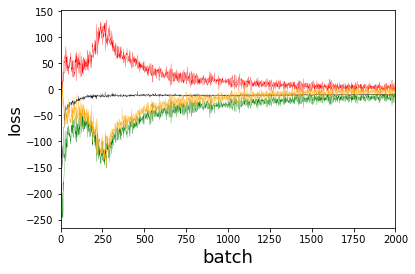

In [16]:
fig = plt.figure()
plt.plot([x[0] for x in gan.critic_losses], color='black', linewidth=0.25)

plt.plot([x[1] for x in gan.critic_losses], color='green', linewidth=0.25)
plt.plot([x[2] for x in gan.critic_losses], color='red', linewidth=0.25)
plt.plot([x[0] for x in gan.generator_losses], color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

plt.xlim(0, 2000)
# plt.ylim(0, 2)

plt.show()
